In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.axes as ax

In [27]:
import kagglehub
import shutil

# Log in to Kaggle
kagglehub.login()

# Step 1: Download to a local directory (relative path)
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Downloaded to:", path)

# Step 2: Copy dataset to Google Drive (if using Colab)
drive_path = "/content/drive/MyDrive/machine_learning/linear_regression_model_data/"
shutil.copytree(path, drive_path, dirs_exist_ok=True)

print("Copied dataset to:", drive_path)


Downloaded to: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1
Copied dataset to: /content/drive/MyDrive/machine_learning/linear_regression_model_data/


In [28]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/machine learning/linear_regression_model_data/archive.zip", "r") as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/machine learning/linear_regression_model_data/")


In [29]:
data = pd.read_csv("/content/drive/MyDrive/machine learning/linear_regression_model_data/Housing.csv")

In [30]:
data.head(10)

price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      yes       yes      yes   
9   9800000   5750         3          2        4      yes       yes       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
5              no             yes        2      yes   semi-furnished  
6              no             yes        2      yes   semi-furnished  
7              no              no        0       no      unfurnished  
8              no             yes        2      yes        furnished  
9              no             yes        1      yes      unfurnished

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df = pd.DataFrame(data)
df = df[['price', 'area']]
df.info()
data = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   545 non-null    int64
 1   area    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [33]:
df.rename(columns={'area': 'SquareFeet'}, inplace=True)
df.rename(columns={'price': 'Price'}, inplace=True)

In [34]:
data.isnull().sum()

Price         0
SquareFeet    0
dtype: int64

In [35]:
from IPython.display import Markdown, display
display(Markdown("## Splitting Data"))

## Splitting Data

In [36]:
split = int(0.8 * len(data))  # 80% for training

#training input and output data
train_input = np.array(data.SquareFeet[0:split]).reshape(-1,1)
train_output = np.array(data.Price[0:split]).reshape(-1,1)

#validatio data input and output
test_input = np.array(data.SquareFeet[split:]).reshape(-1,1)
test_output = np.array(data.Price[split:]).reshape(-1,1)



In [37]:
from IPython.display import HTML, display
display(HTML("<font color='green' size='5'><b>Linear Regression</b></font>"))


In [38]:
from IPython.display import Markdown, display
display(Markdown("## Forward propagation"))

## Forward propagation

In [39]:
def forward_propagation(train_input,parameters):
  m = parameters["m"]
  c = parameters['c']

  predictions = np.multiply(m,train_input) + c

  return predictions

In [40]:
from IPython.display import Markdown, display
display(Markdown("## Cost function"))

## Cost function

In [41]:
def cost_fucntion(predictions, train_output):
  cost = np.mean((train_output - predictions)**2)*0.5
  return cost

In [42]:
from IPython.display import Markdown, display
display(Markdown("## gradient descent backword propagation"))

## gradient descent backword propagation

In [43]:
def backword_propogation(train_input,train_output,predictions):
  derivatives = dict()
  df = predictions - train_output
  dm = np.mean(np.multiply(df,train_input))
  dc = np.mean(df)

  derivatives["dm"]=dm
  derivatives["dc"]= dc

  return derivatives


In [44]:
from IPython.display import Markdown, display
display(Markdown("## update parameters"))

## update parameters

In [45]:
def update_parameters(parameters,derivatives,learning_rate):
  parameters["m"] = parameters["m"]-learning_rate * derivatives["dm"]
  parameters["c"]= parameters["c"] - learning_rate * derivatives["dc"]

  return parameters

In [46]:
from IPython.display import Markdown, display
display(Markdown("## Model training"))

## Model training

In [47]:
def train(train_input,train_output,learning_rate,iters):

  # random parameters
  parameters = dict()
  parameters["m"] = np.random.uniform(0,1)
  parameters["c"] = np.random.uniform(0,1)

  plt.figure()

  #loss
  loss = []

  #iteration
  for i in range(iters):

    # forward propogation
    predictions = forward_propagation(train_input,parameters)

    #cost
    cost = cost_fucntion(predictions,train_output)

    loss.append(cost)
    print(f"iteration ={i+1},Loss = {cost}")

    #plot
    fig,ax = plt.subplots()

    ax.plot(train_input,train_output,"+",label = "original")
    ax.plot(train_input,predictions,"*",label = "Training ")

    legend = ax.legend()

    plt.plot(train_input,train_output,"+",label = "original")
    plt.plot(train_input,predictions,"*",label = "Training ")
    plt.show()

    #back propogation
    derivatives = backword_propogation(train_input,train_output,predictions)

    #update the parameters
    parameters = update_parameters(parameters,derivatives,learning_rate)
  return parameters,loss

In [48]:
from IPython.display import Markdown,display
display(Markdown("## Training the model"))


## Training the model

iteration =1,Loss = 15417740722781.305


<Figure size 640x480 with 0 Axes>

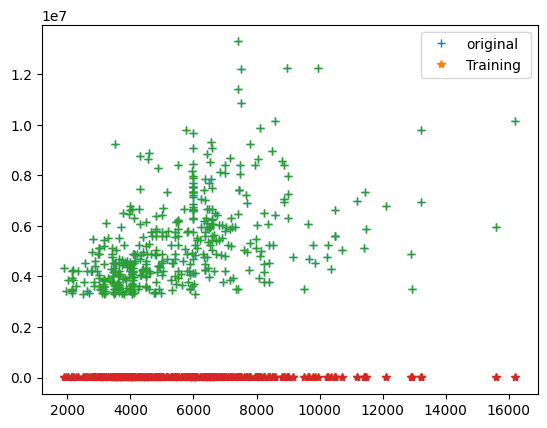

iteration =2,Loss = 14488358630115.074


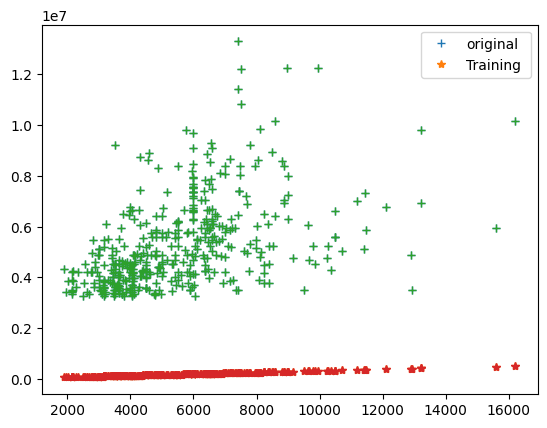

iteration =3,Loss = 13622839970750.094


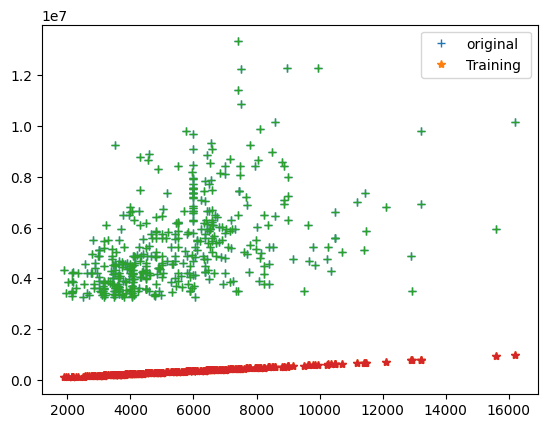

iteration =4,Loss = 12816796304080.408


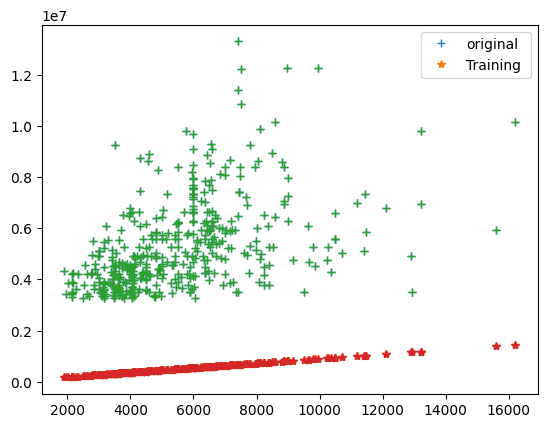

iteration =5,Loss = 12066140745648.18


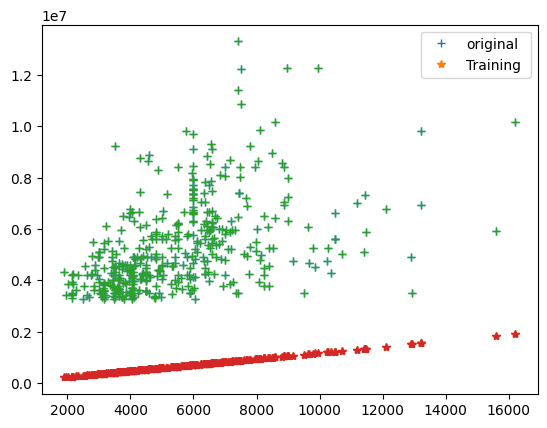

iteration =6,Loss = 11367067245407.055


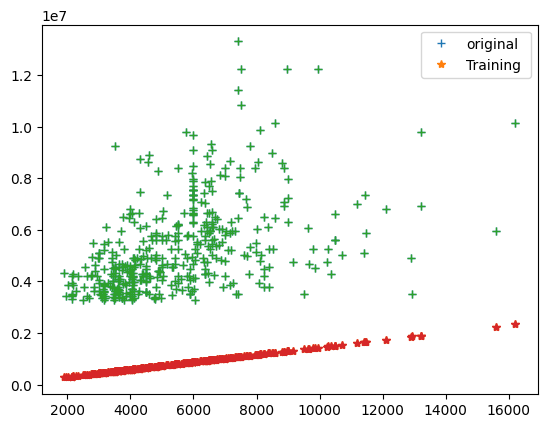

iteration =7,Loss = 10716031289900.688


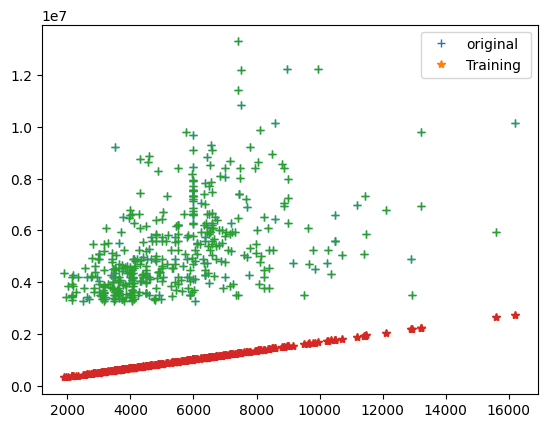

iteration =8,Loss = 10109731930510.637


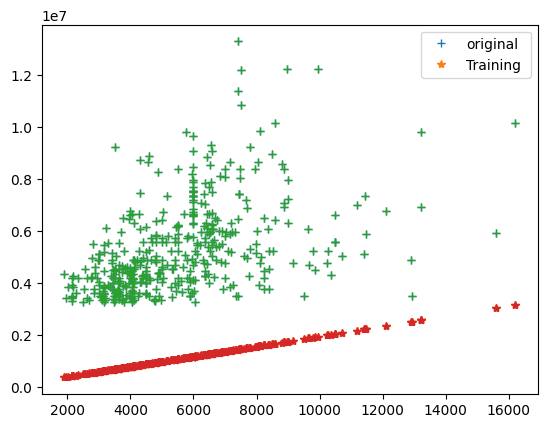

iteration =9,Loss = 9545095046651.45


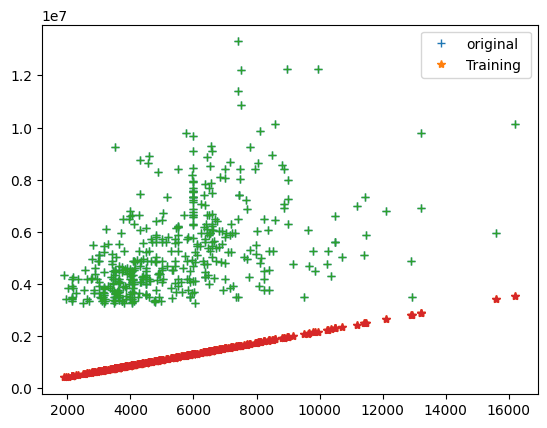

iteration =10,Loss = 9019257759052.264


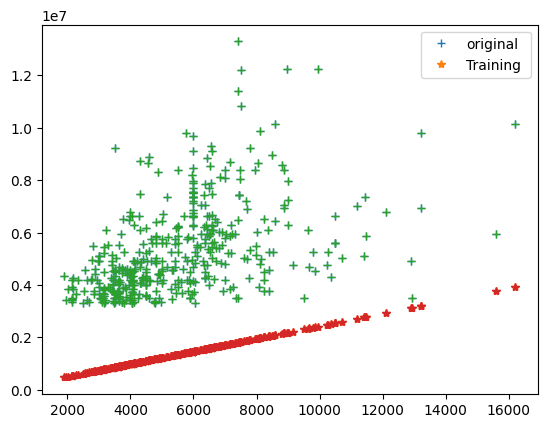

iteration =11,Loss = 8529553914095.571


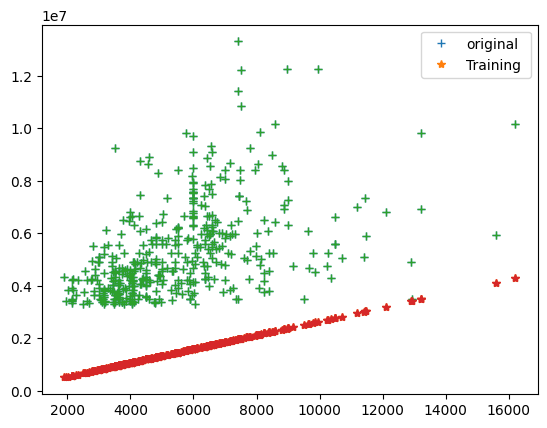

iteration =12,Loss = 8073500565614.402


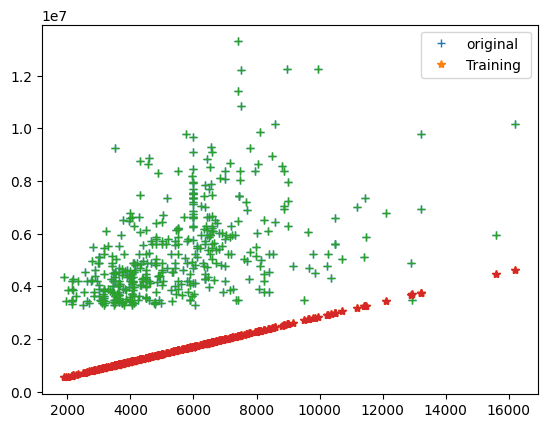

iteration =13,Loss = 7648785385606.478


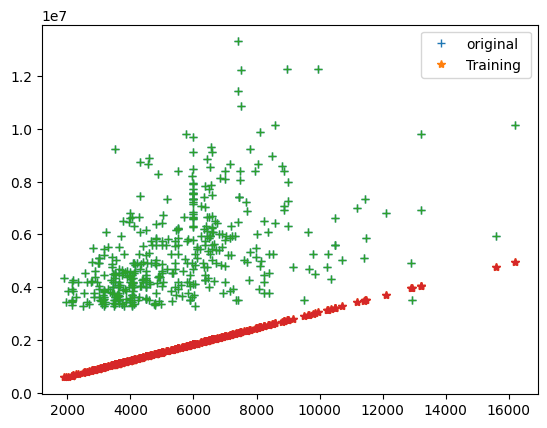

iteration =14,Loss = 7253254940033.954


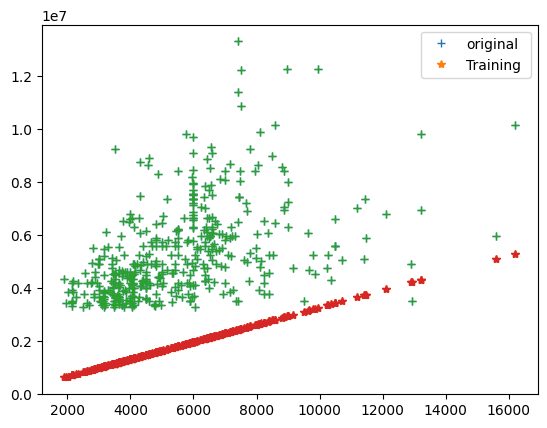

iteration =15,Loss = 6884903770263.47


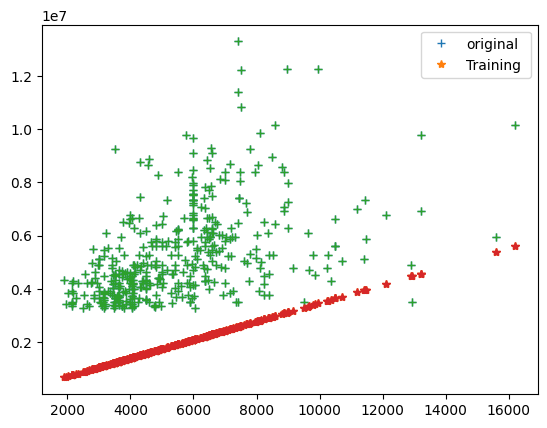

iteration =16,Loss = 6541864224786.099


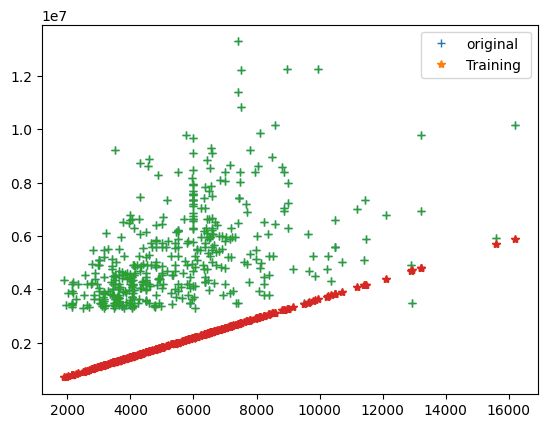

iteration =17,Loss = 6222396989661.0


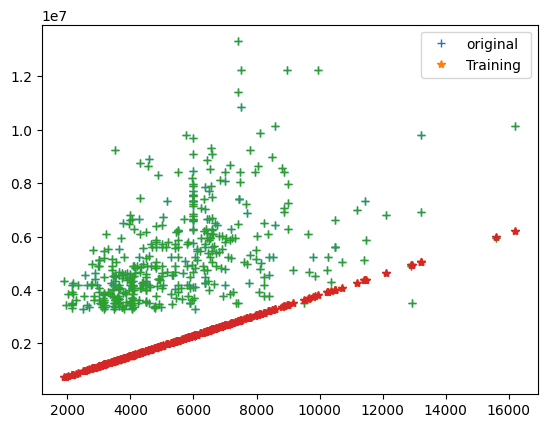

iteration =18,Loss = 5924882269669.239


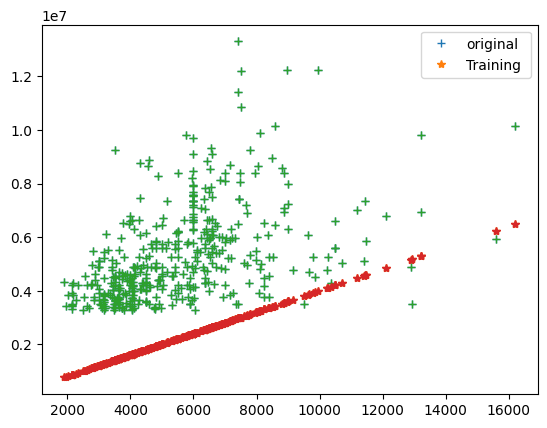

iteration =19,Loss = 5647811575463.562


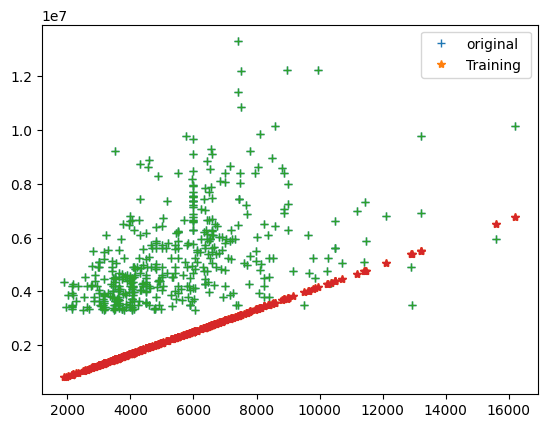

iteration =20,Loss = 5389780075072.506


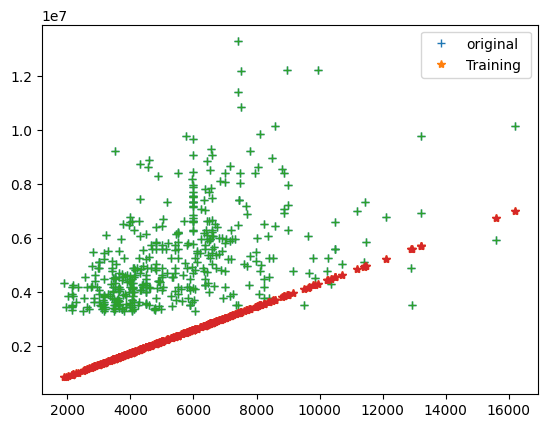

iteration =21,Loss = 5149479470978.672


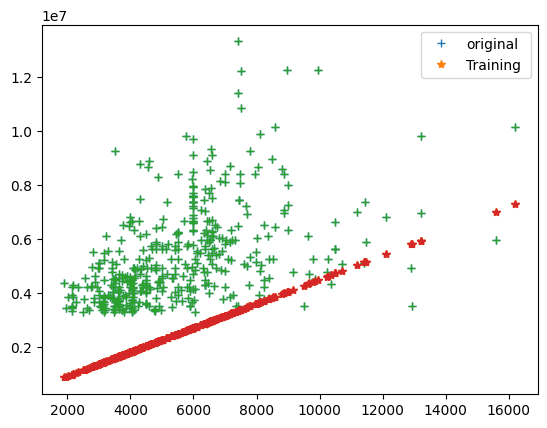

iteration =22,Loss = 4925691366655.772


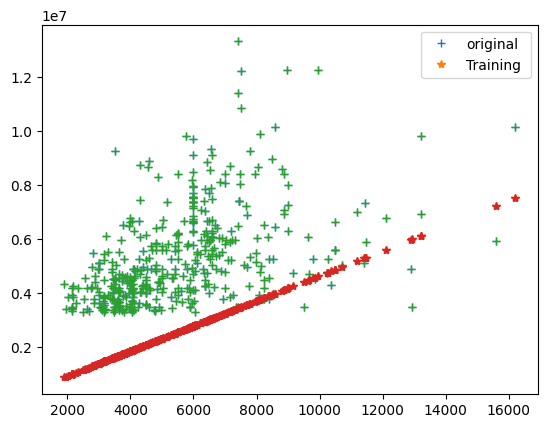

iteration =23,Loss = 4717281088930.84


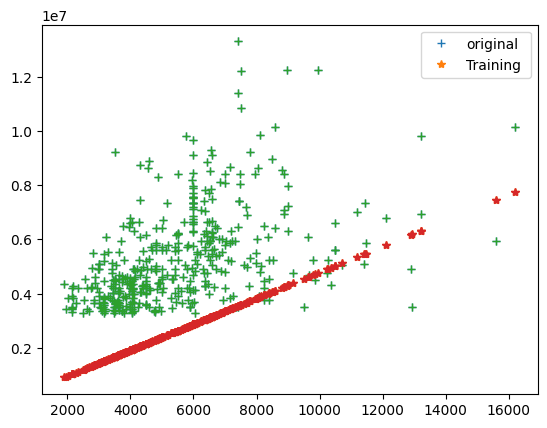

iteration =24,Loss = 4523191934849.064


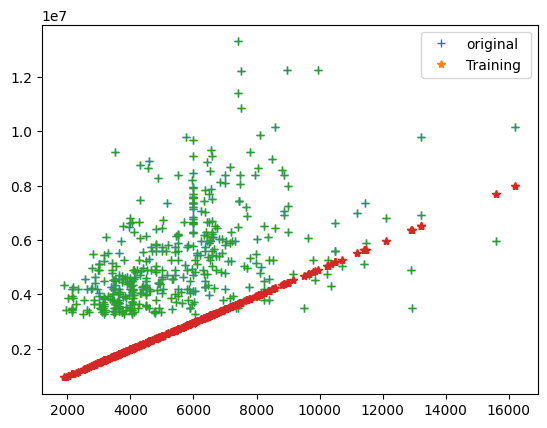

iteration =25,Loss = 4342439813871.147


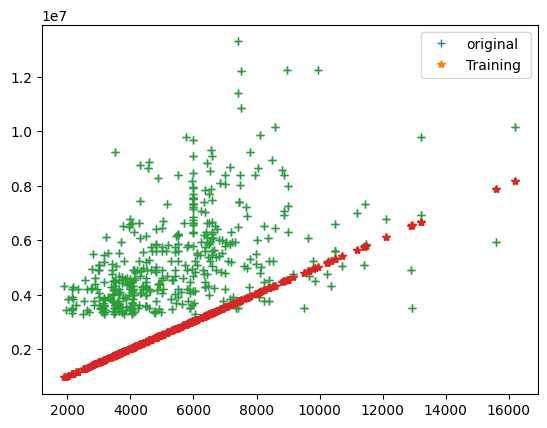

iteration =26,Loss = 4174108258237.522


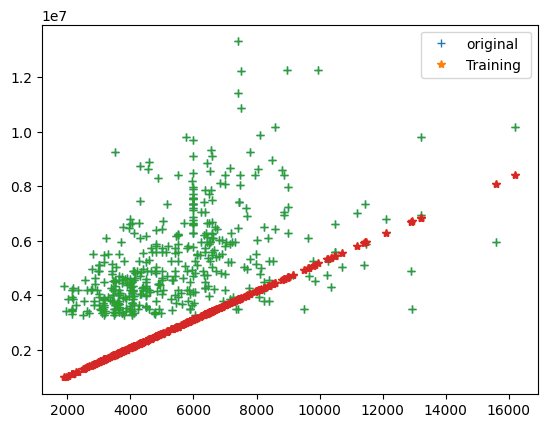

iteration =27,Loss = 4017343776200.4346


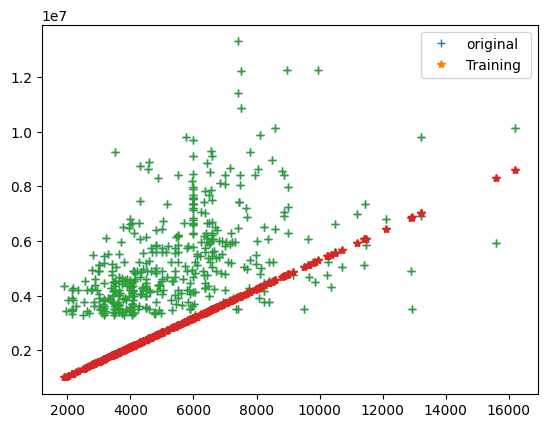

iteration =28,Loss = 3871351524563.409


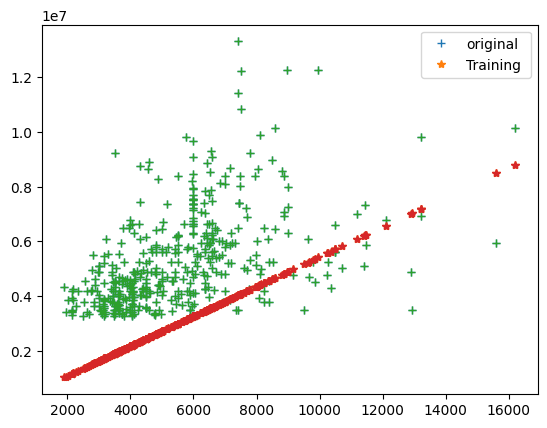

iteration =29,Loss = 3735391278586.5483


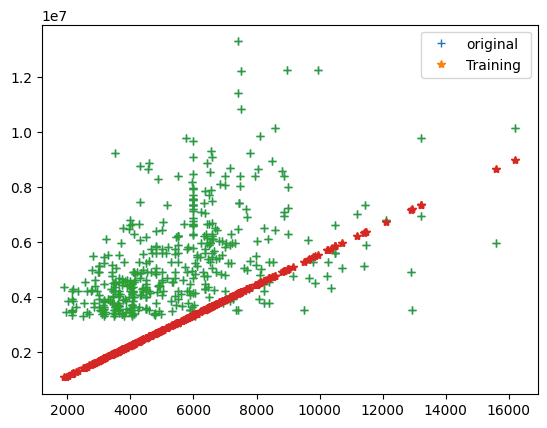

iteration =30,Loss = 3608773678823.8794


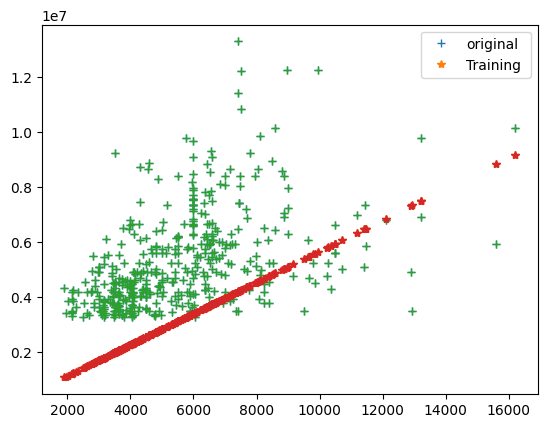

iteration =31,Loss = 3490856735863.09


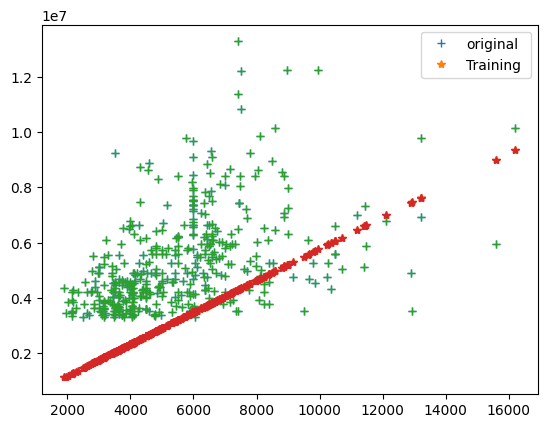

iteration =32,Loss = 3381042575245.604


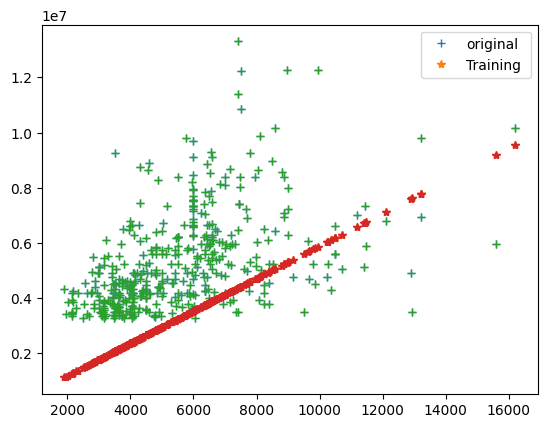

iteration =33,Loss = 3278774406062.7793


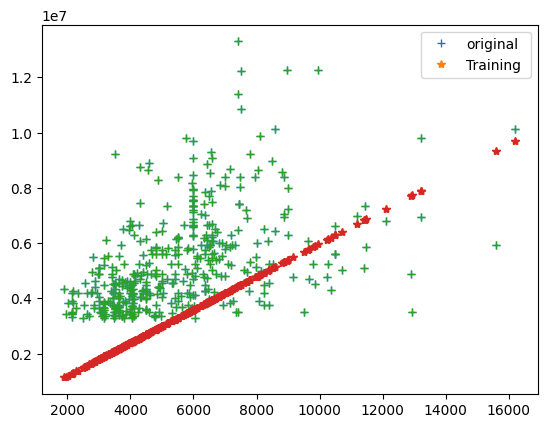

iteration =34,Loss = 3183533697858.108


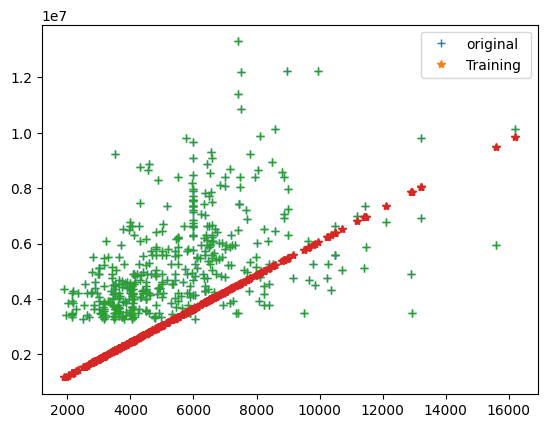

iteration =35,Loss = 3094837551521.422


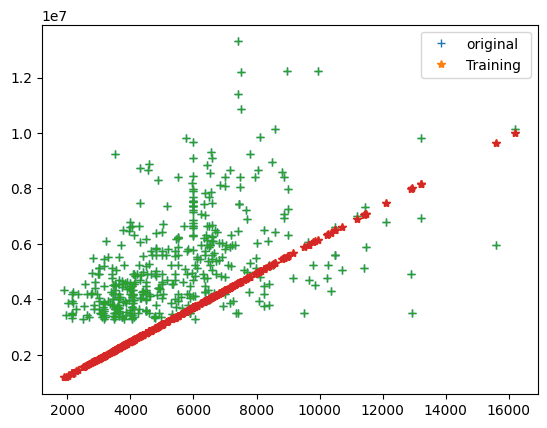

iteration =36,Loss = 3012236250844.7915


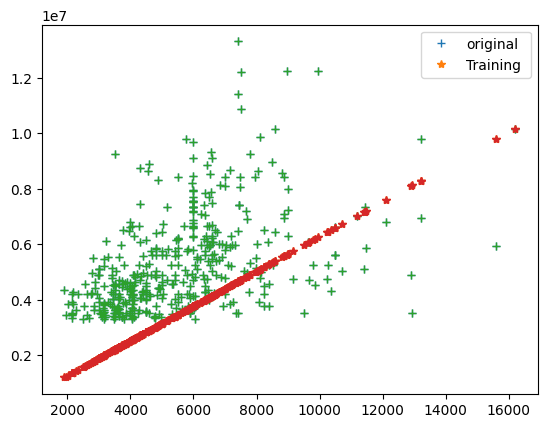

iteration =37,Loss = 2935310982325.73


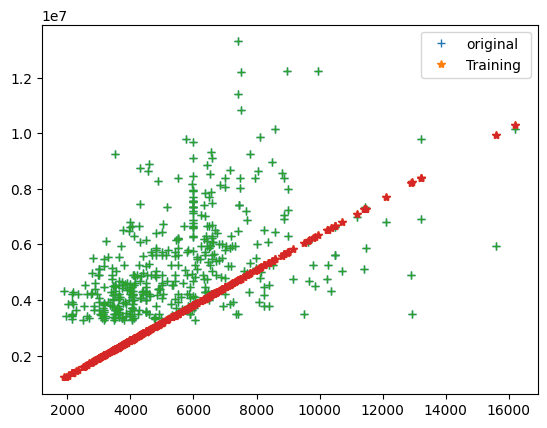

iteration =38,Loss = 2863671711656.444


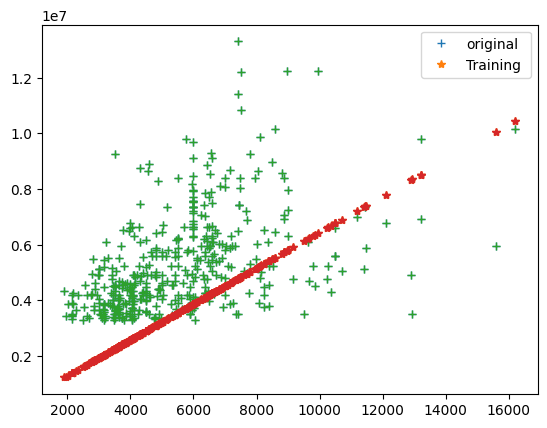

iteration =39,Loss = 2796955206132.274


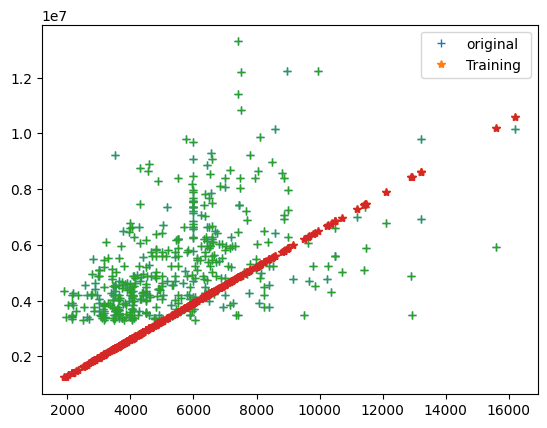

iteration =40,Loss = 2734823192952.341


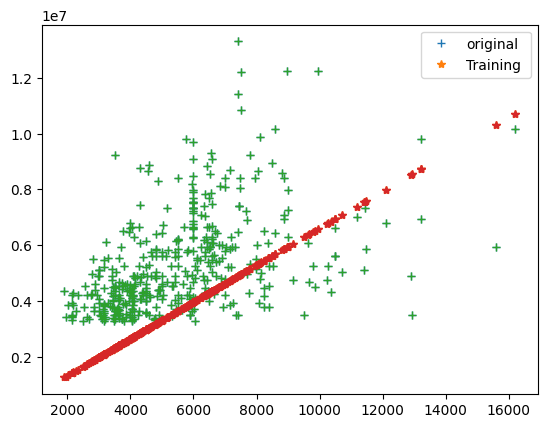

iteration =41,Loss = 2676960644074.444


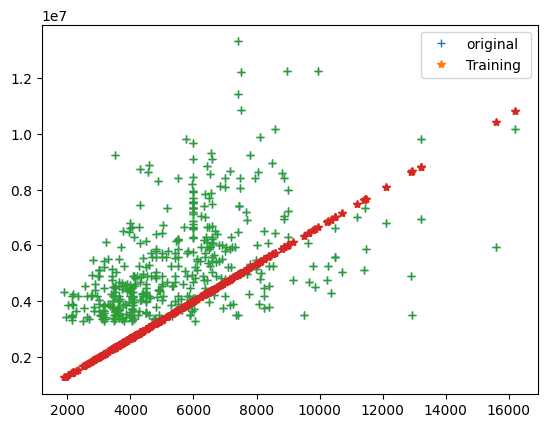

iteration =42,Loss = 2623074178927.8843


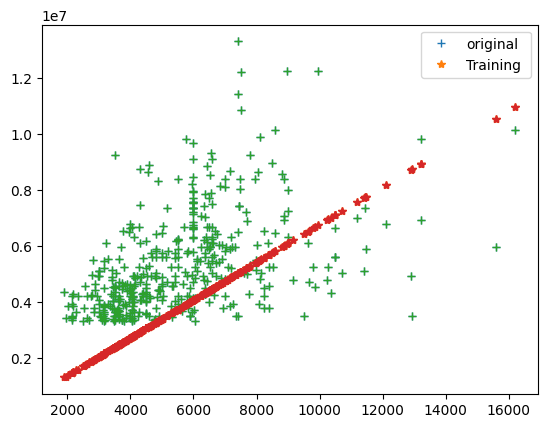

iteration =43,Loss = 2572890576885.4995


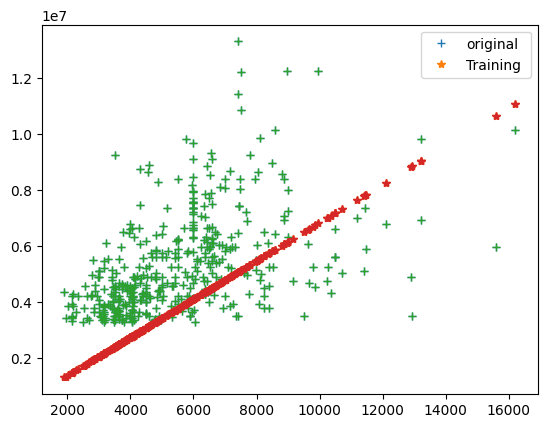

iteration =44,Loss = 2526155391952.693


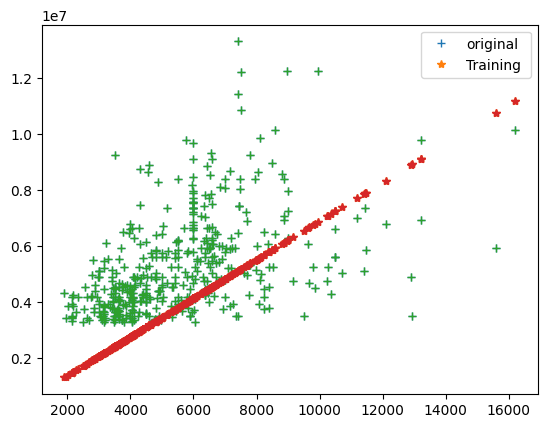

iteration =45,Loss = 2482631662649.512


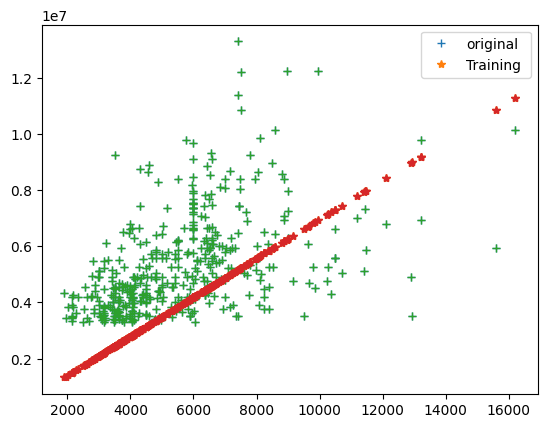

iteration =46,Loss = 2442098710544.486


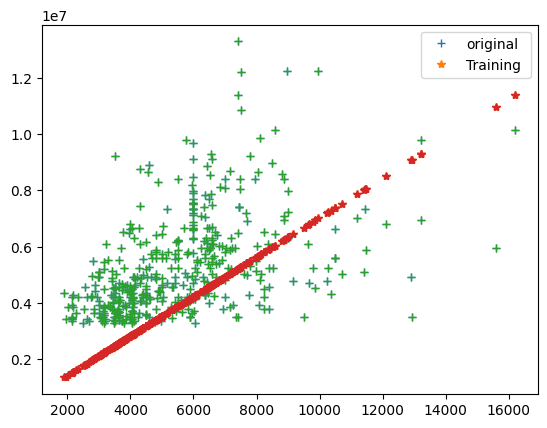

iteration =47,Loss = 2404351021348.4297


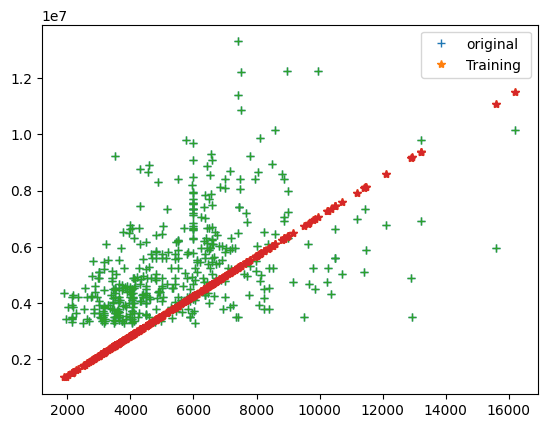

iteration =48,Loss = 2369197202895.026


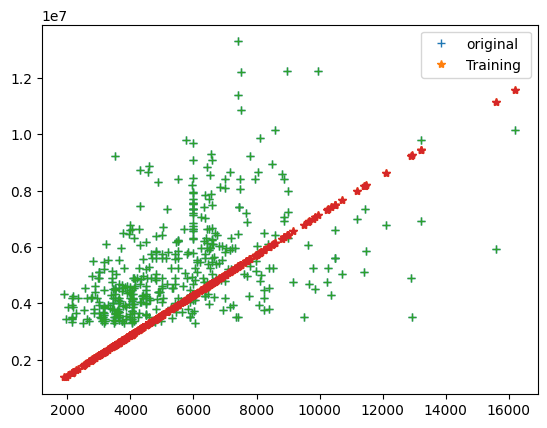

iteration =49,Loss = 2336459014724.8257


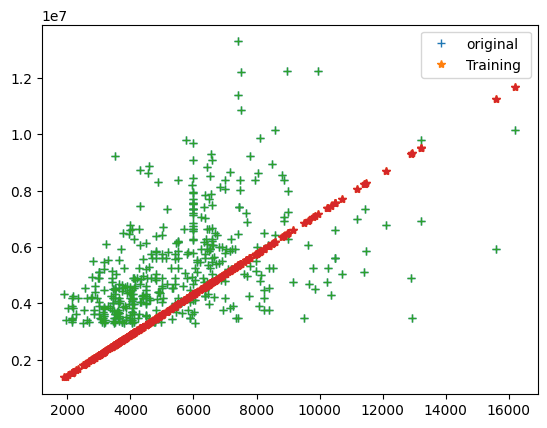

iteration =50,Loss = 2305970464352.366


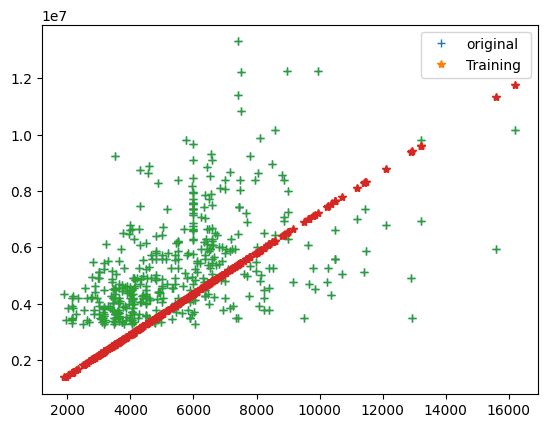

iteration =51,Loss = 2277576965634.2173


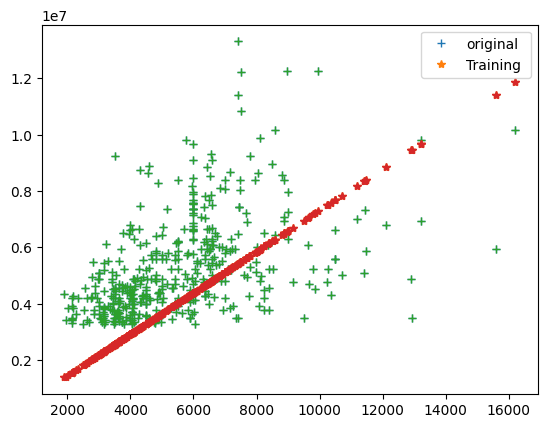

iteration =52,Loss = 2251134554970.6147


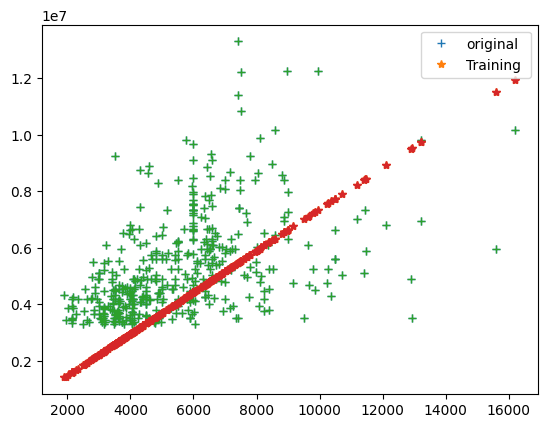

iteration =53,Loss = 2226509161366.5957


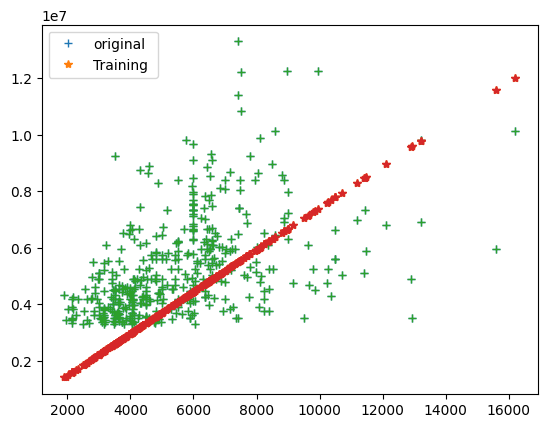

iteration =54,Loss = 2203575926651.628


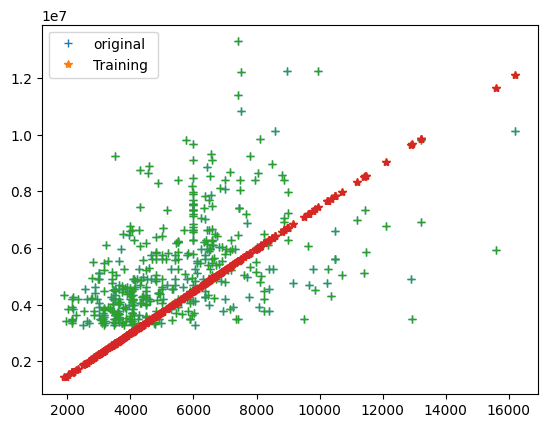

iteration =55,Loss = 2182218572411.028


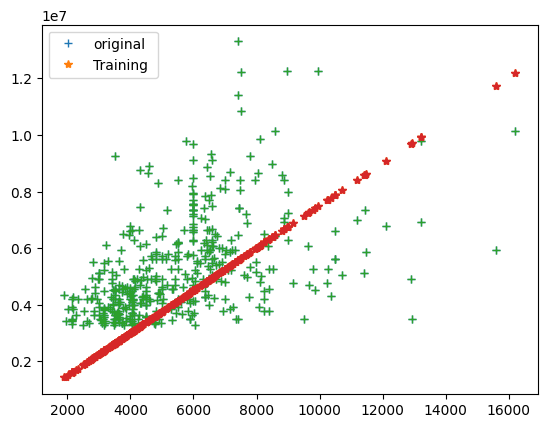

iteration =56,Loss = 2162328810419.3376


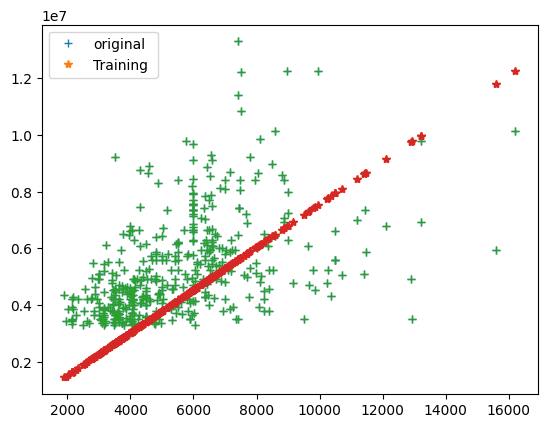

iteration =57,Loss = 2143805793586.3662


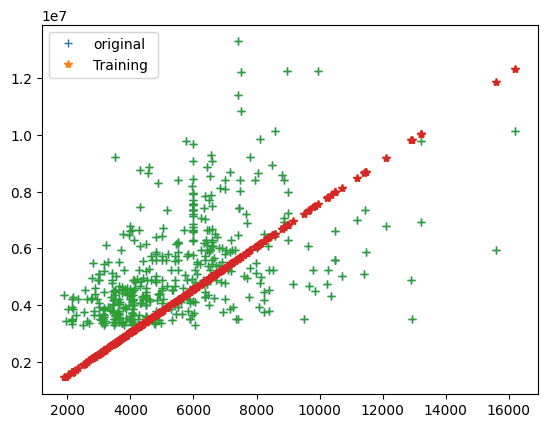

iteration =58,Loss = 2126555604632.0269


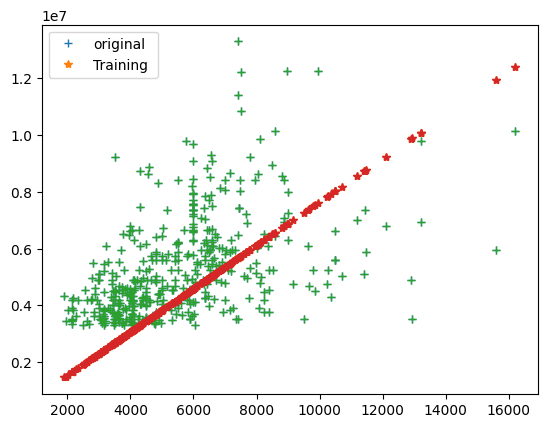

iteration =59,Loss = 2110490779897.413


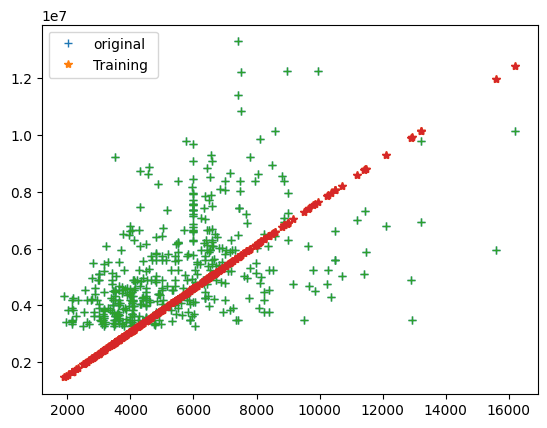

iteration =60,Loss = 2095529865877.665


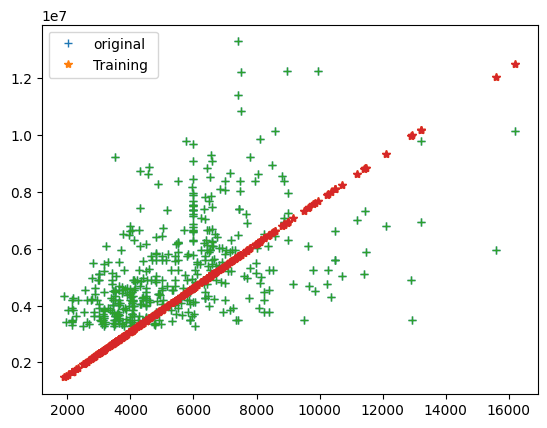

iteration =61,Loss = 2081597006228.142


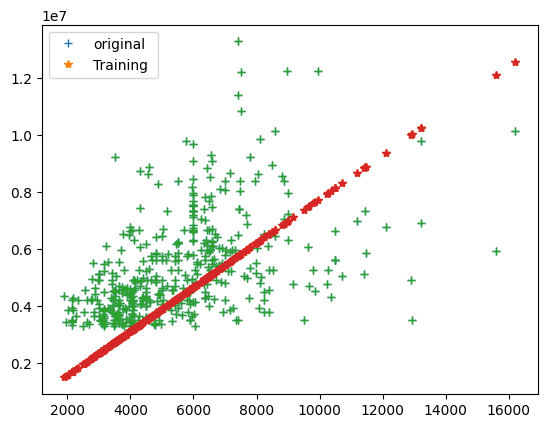

iteration =62,Loss = 2068621557149.8782


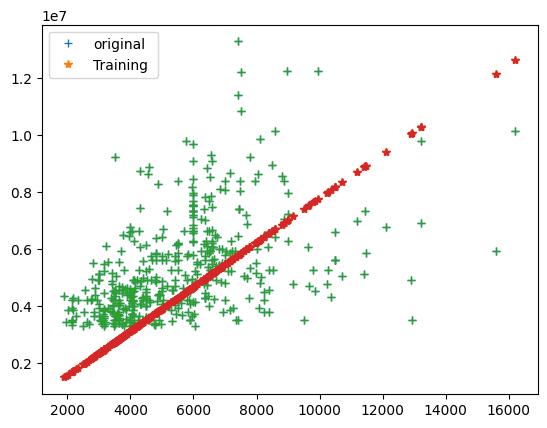

iteration =63,Loss = 2056537729204.2173


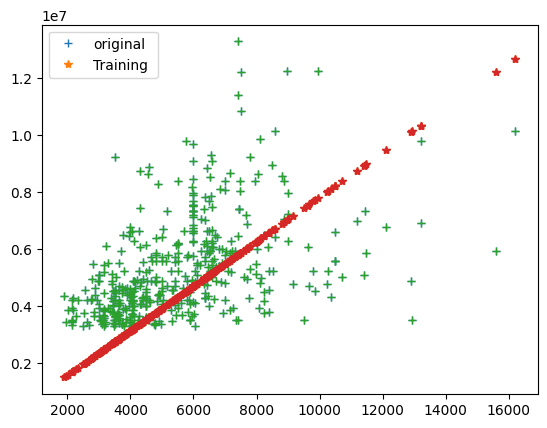

iteration =64,Loss = 2045284253740.5225


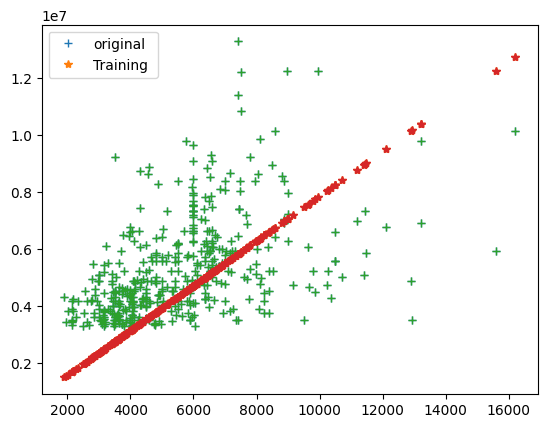

iteration =65,Loss = 2034804072245.6394


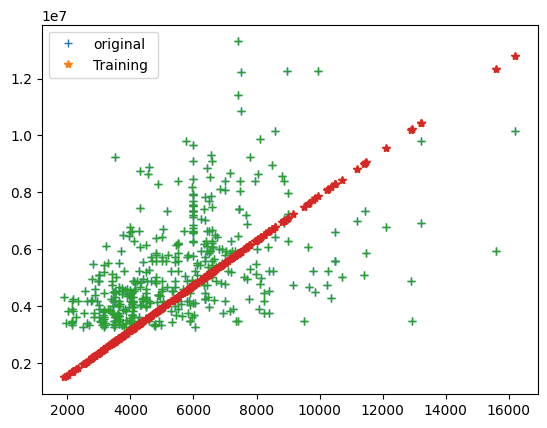

iteration =66,Loss = 2025044047040.0276


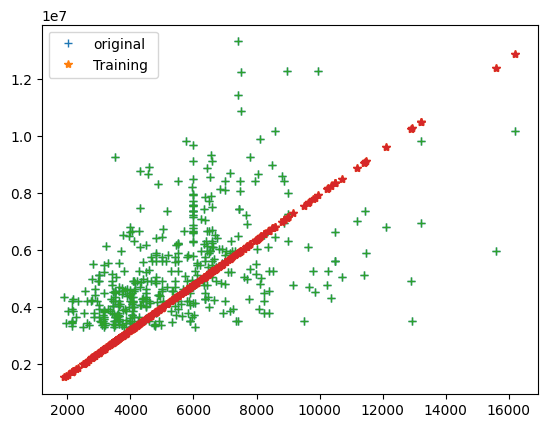

iteration =67,Loss = 2015954691853.7026


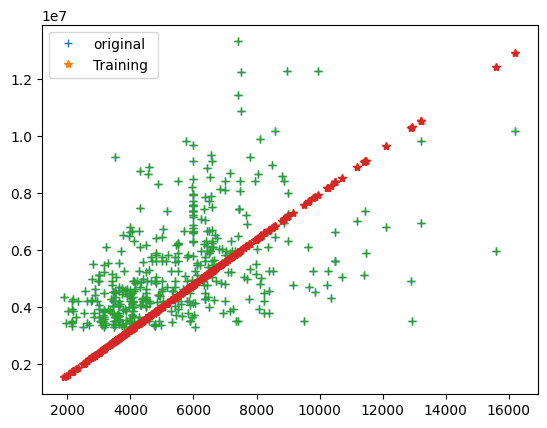

iteration =68,Loss = 2007489920915.9243


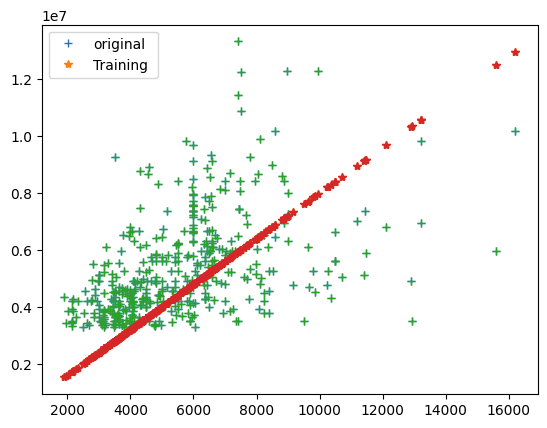

iteration =69,Loss = 1999606815286.4402


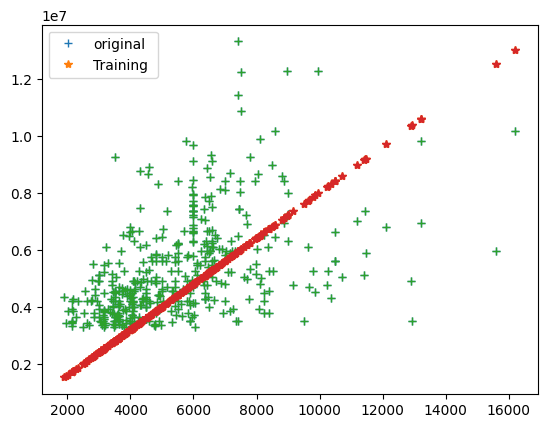

iteration =70,Loss = 1992265405243.5168


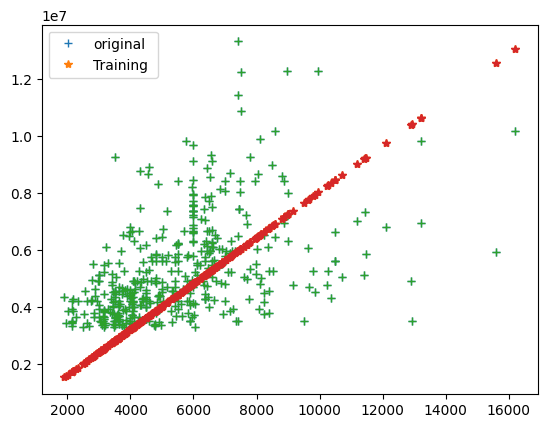

iteration =71,Loss = 1985428467625.3967


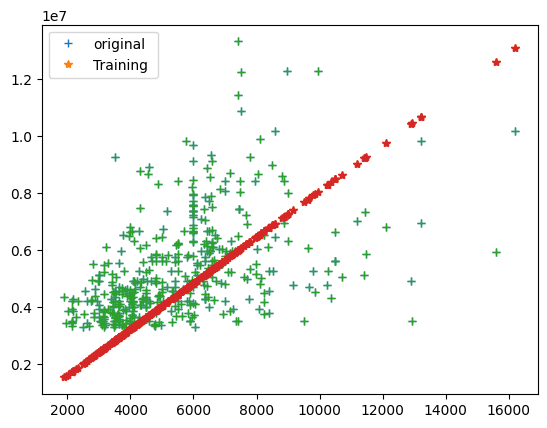

iteration =72,Loss = 1979061337097.6453


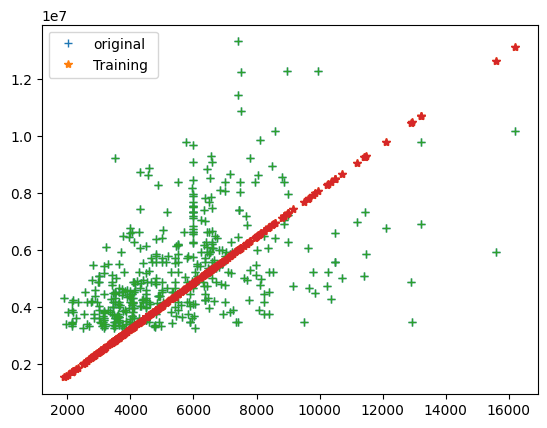

iteration =73,Loss = 1973131730389.4473


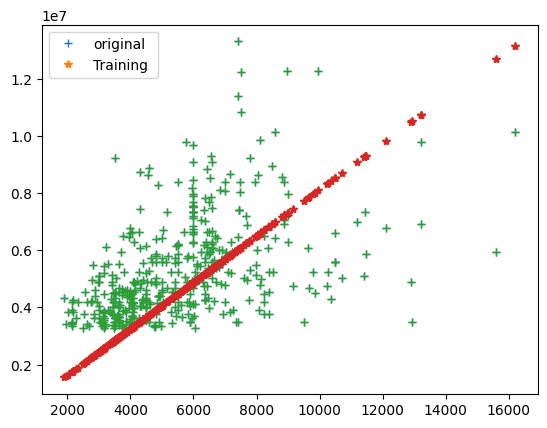

iteration =74,Loss = 1967609582607.6953


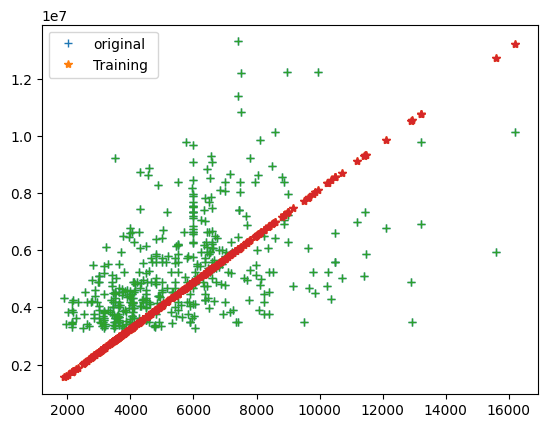

iteration =75,Loss = 1962466894798.908


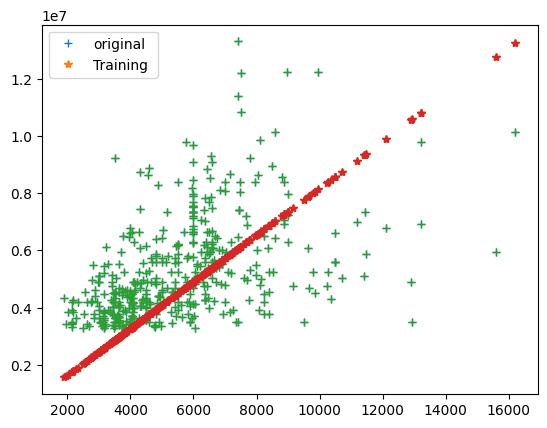

iteration =76,Loss = 1957677591986.0984


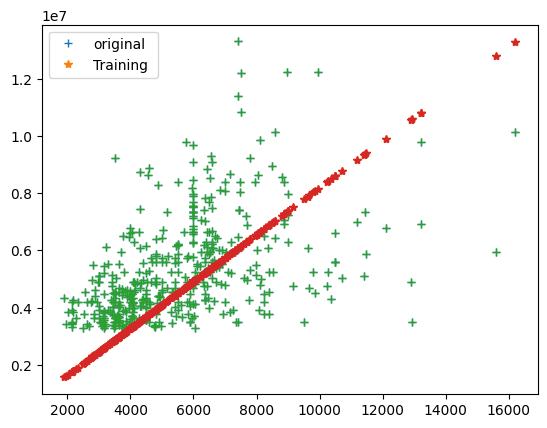

iteration =77,Loss = 1953217390960.7732


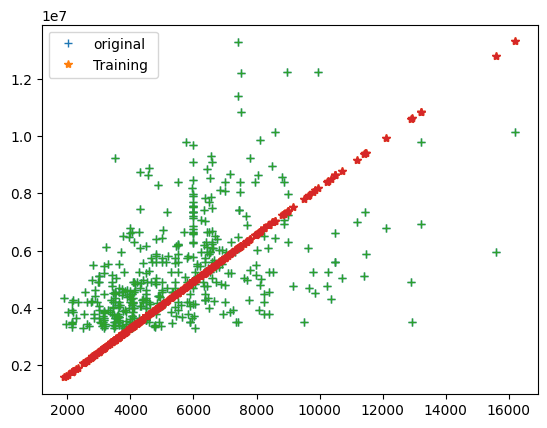

iteration =78,Loss = 1949063677159.7466


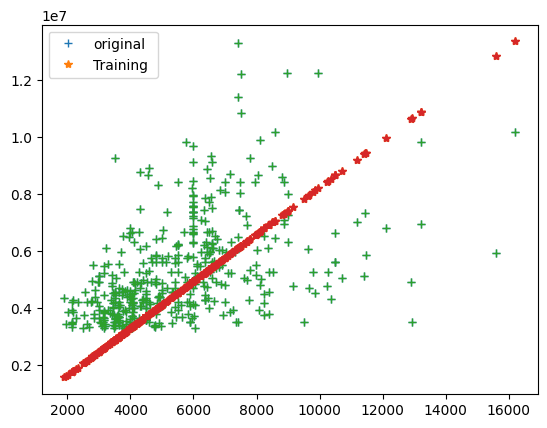

iteration =79,Loss = 1945195390002.484


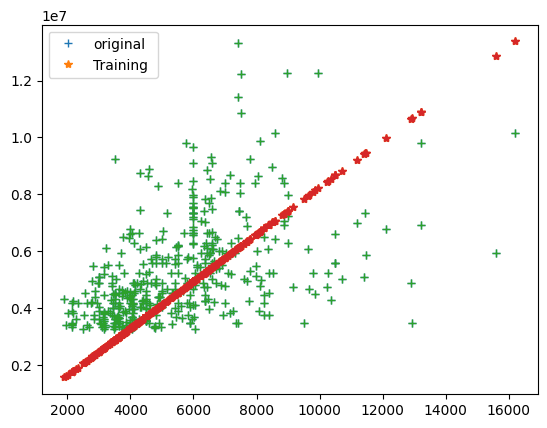

iteration =80,Loss = 1941592916107.6042


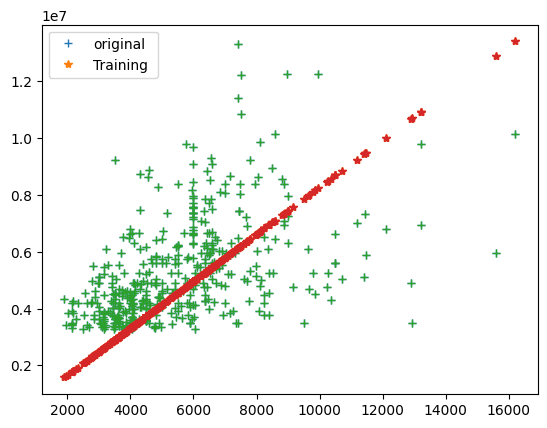

iteration =81,Loss = 1938237989847.1296


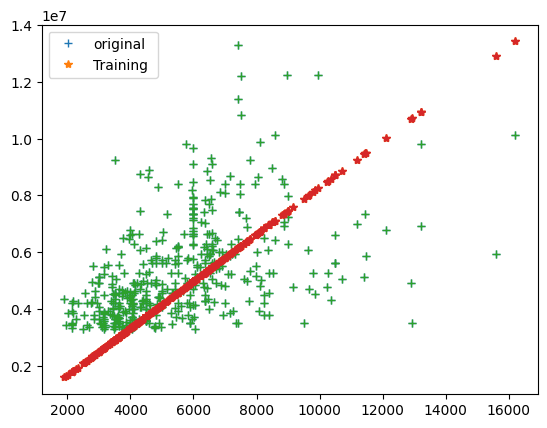

iteration =82,Loss = 1935113600734.2322


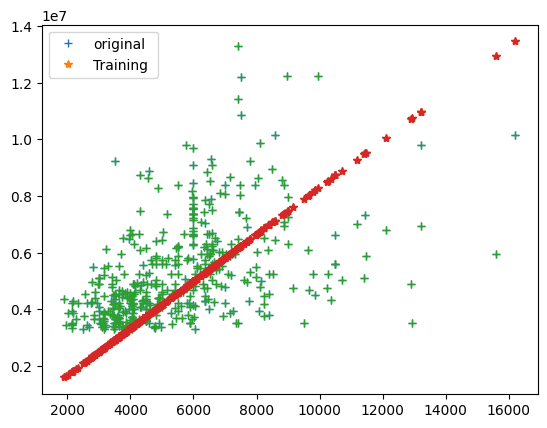

iteration =83,Loss = 1932203907174.949


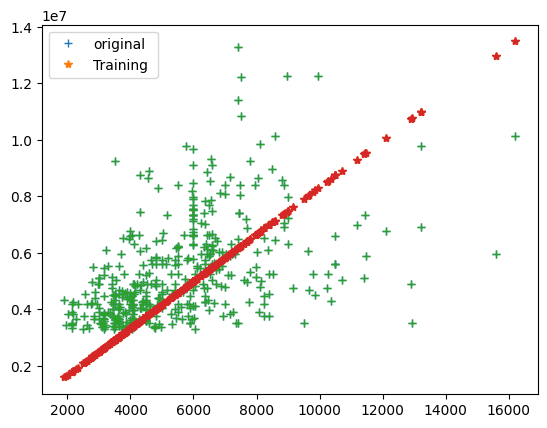

iteration =84,Loss = 1929494156146.513


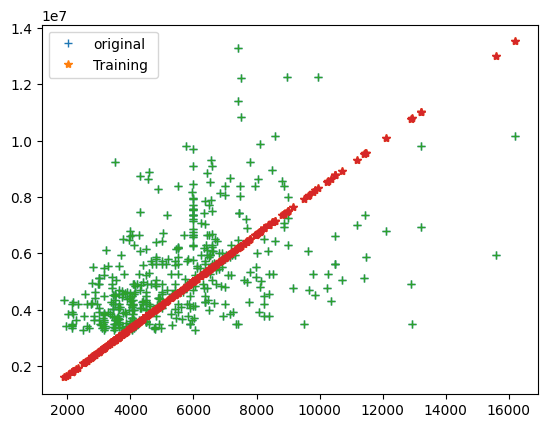

iteration =85,Loss = 1926970608395.0842


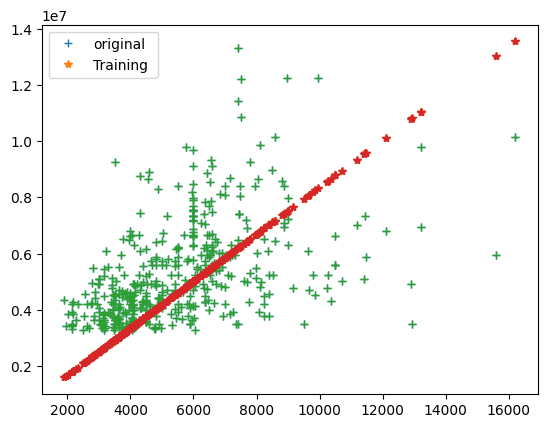

iteration =86,Loss = 1924620468773.5889


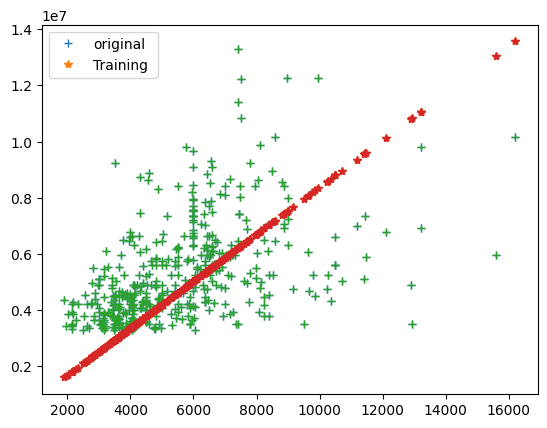

iteration =87,Loss = 1922431821366.4624


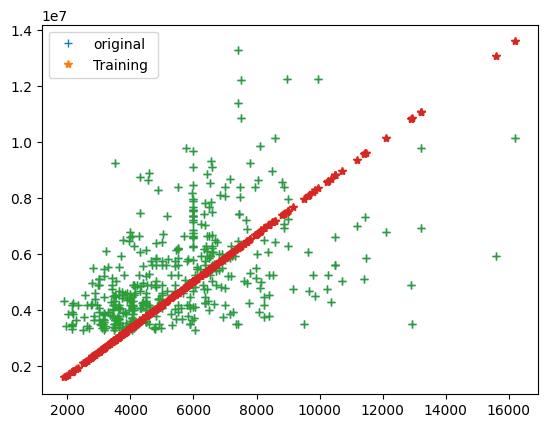

iteration =88,Loss = 1920393569072.368


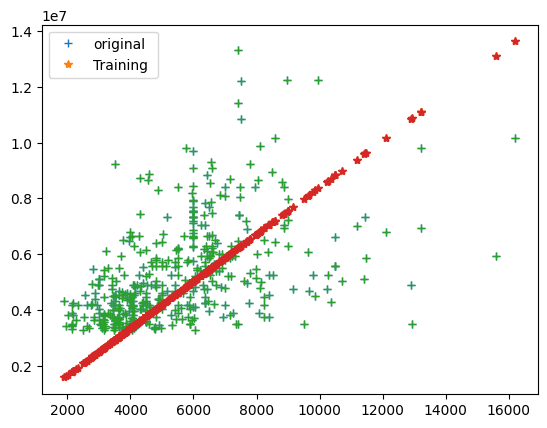

iteration =89,Loss = 1918495377338.5447


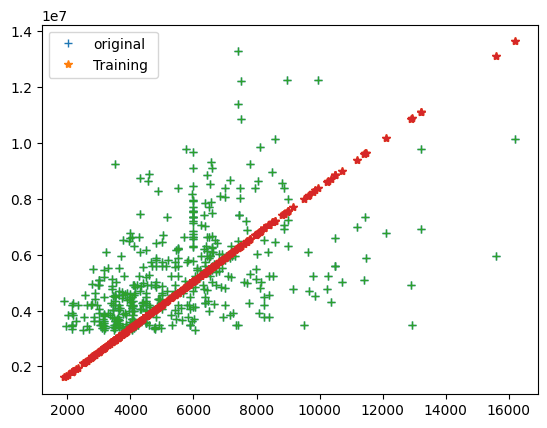

iteration =90,Loss = 1916727621761.508


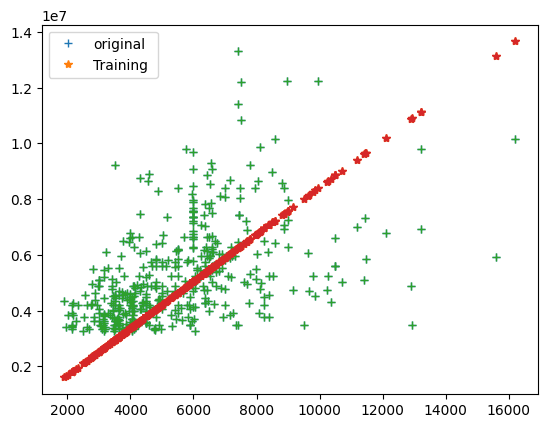

iteration =91,Loss = 1915081339288.423


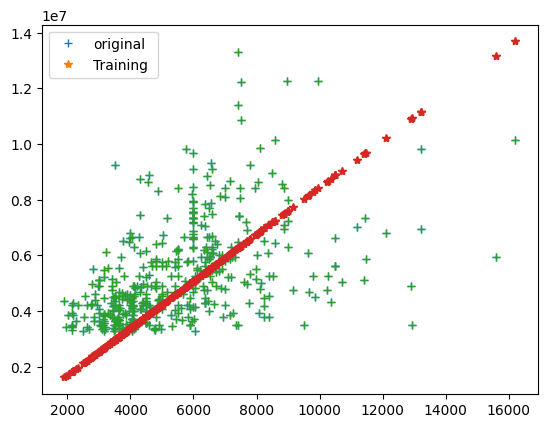

iteration =92,Loss = 1913548182771.7217


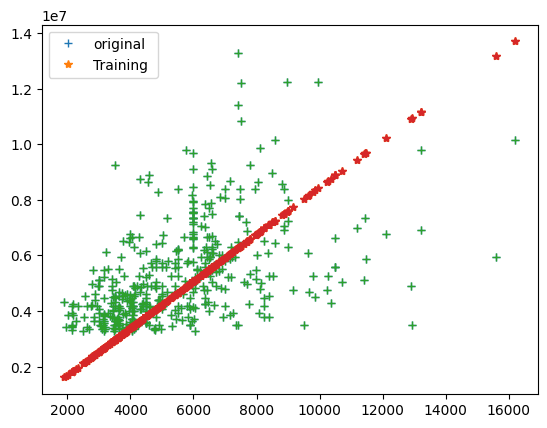

iteration =93,Loss = 1912120378646.5498


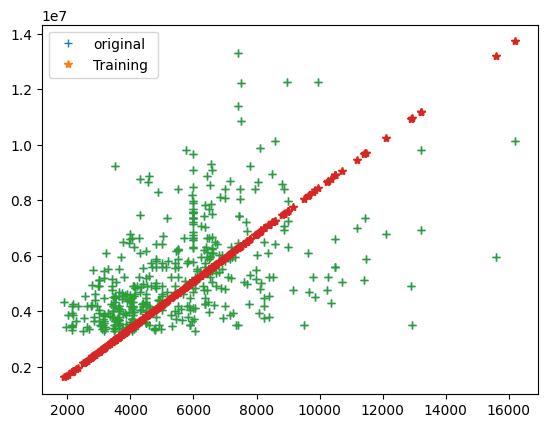

iteration =94,Loss = 1910790687516.449


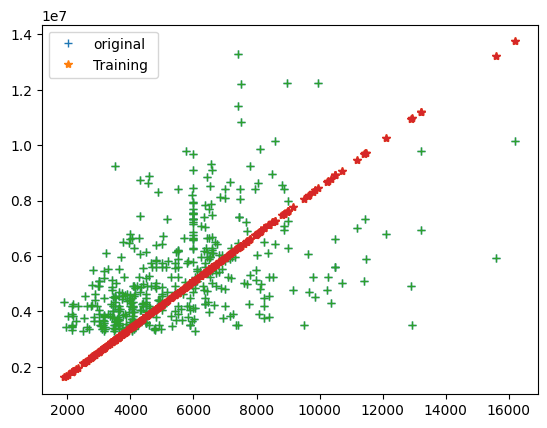

iteration =95,Loss = 1909552367447.4304


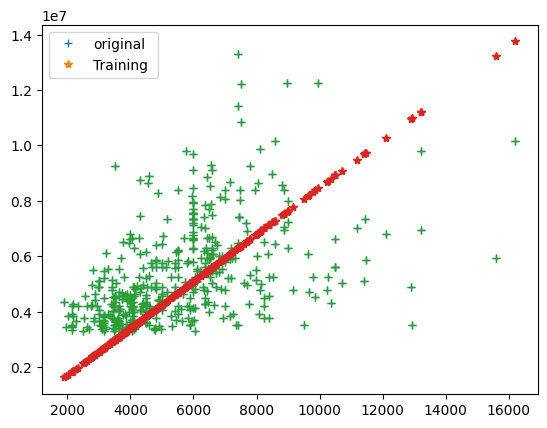

iteration =96,Loss = 1908399139784.3406


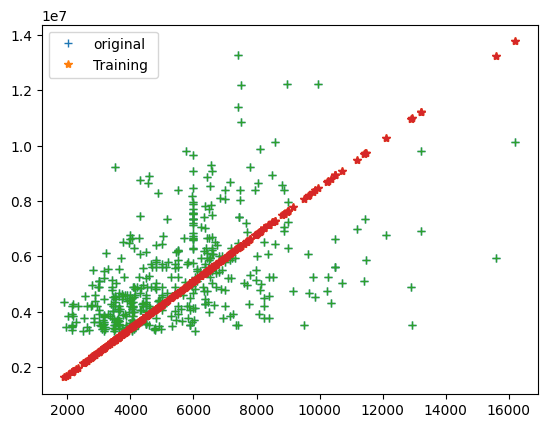

iteration =97,Loss = 1907325157316.1838


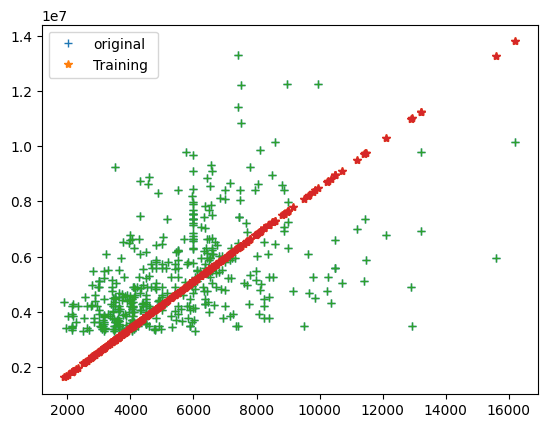

iteration =98,Loss = 1906324974628.9988


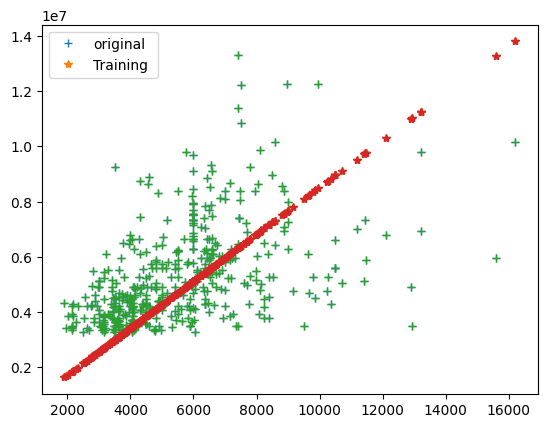

iteration =99,Loss = 1905393520495.97


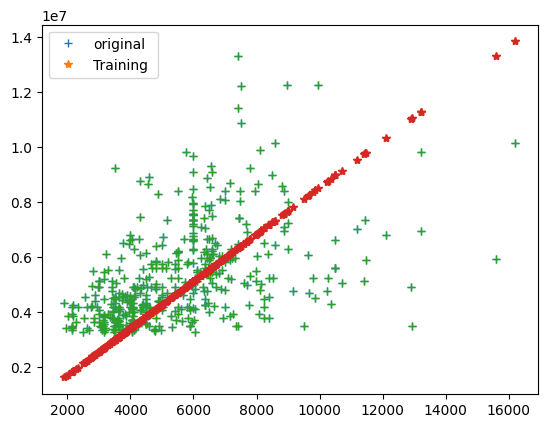

iteration =100,Loss = 1904526072164.7751


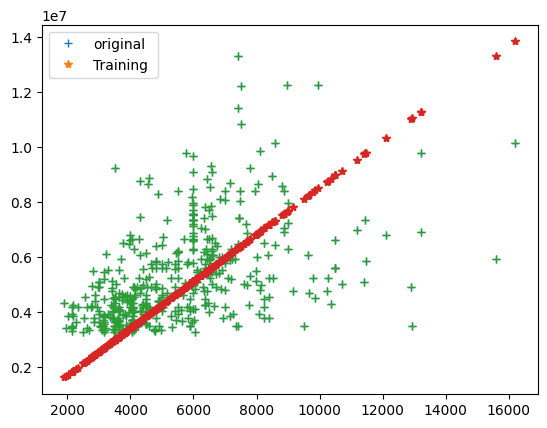

iteration =101,Loss = 1903718231411.812


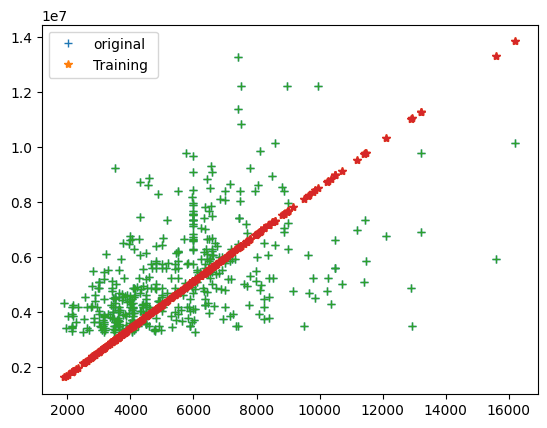

iteration =102,Loss = 1902965902241.872


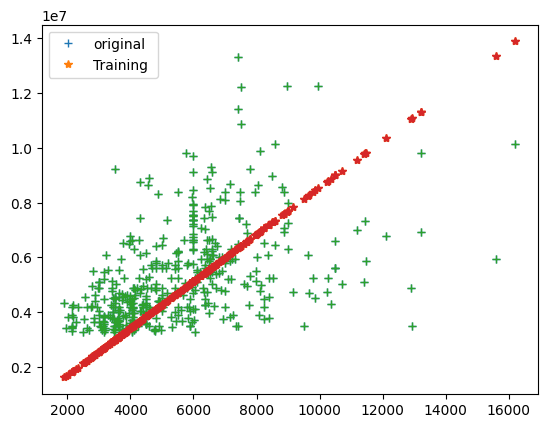

iteration =103,Loss = 1902265270120.2144


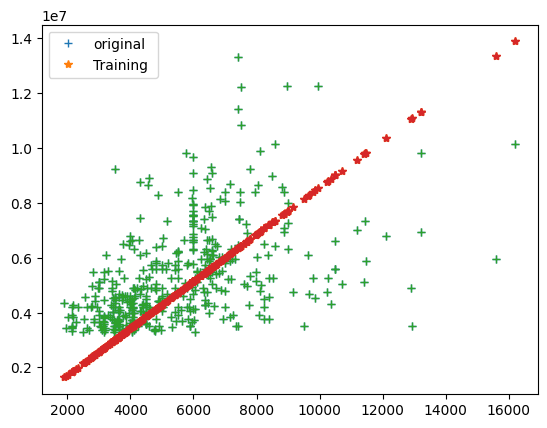

iteration =104,Loss = 1901612782631.7207


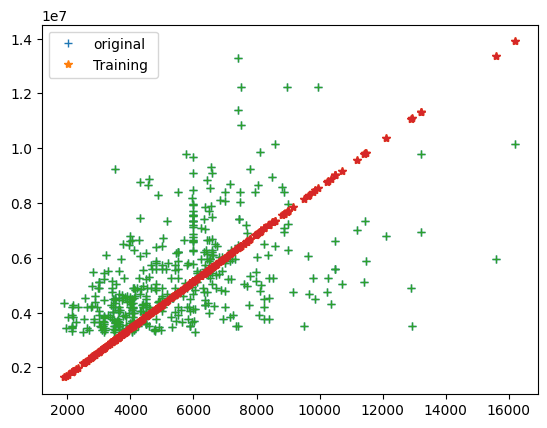

iteration =105,Loss = 1901005131469.0835


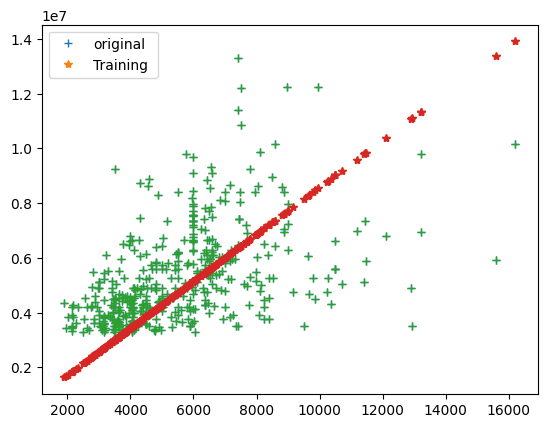

iteration =106,Loss = 1900439235658.687


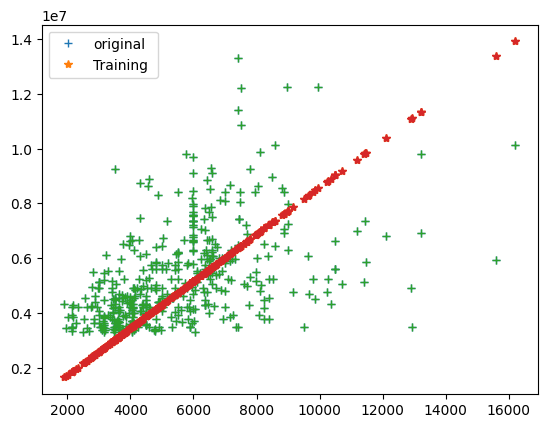

iteration =107,Loss = 1899912225939.143


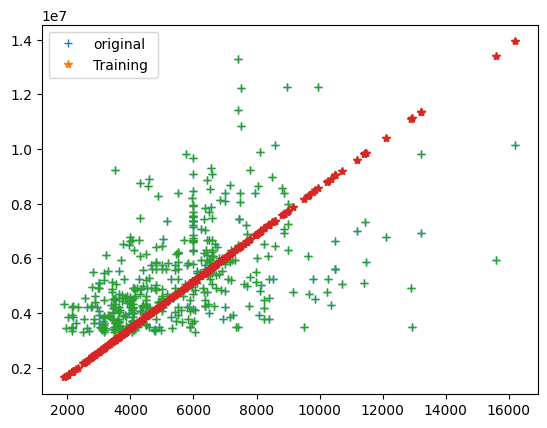

iteration =108,Loss = 1899421430213.2698


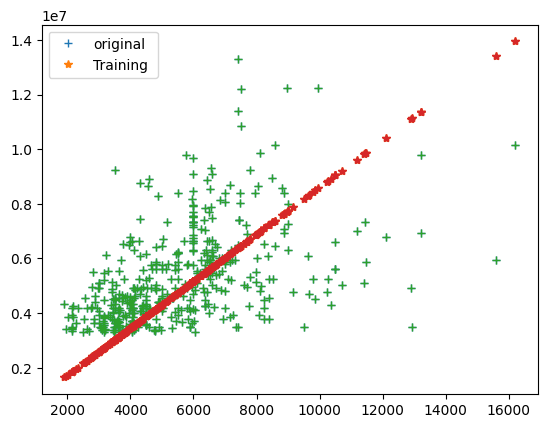

iteration =109,Loss = 1898964359999.7556


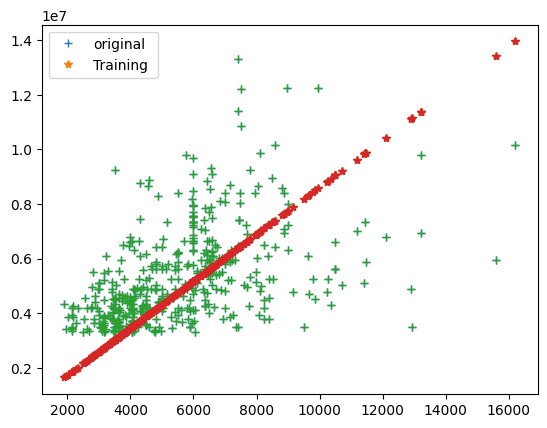

iteration =110,Loss = 1898538697815.8044


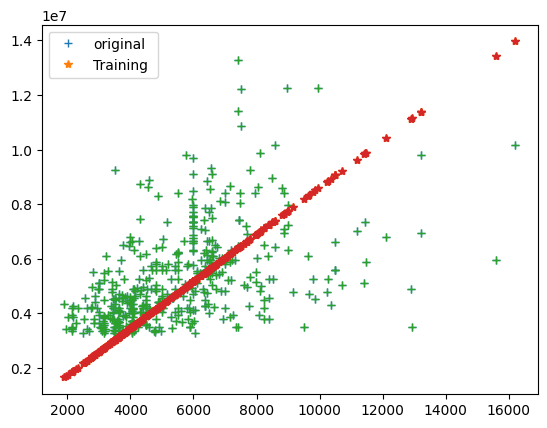

iteration =111,Loss = 1898142285426.804


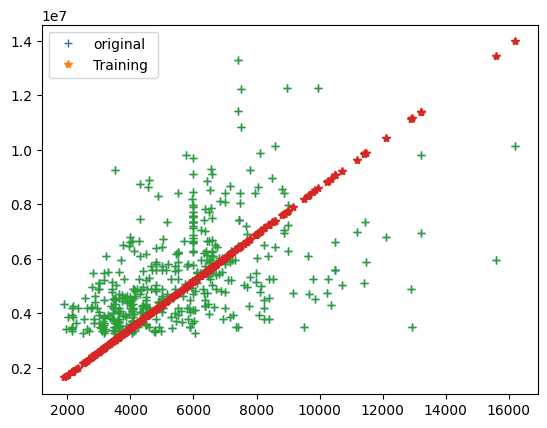

iteration =112,Loss = 1897773112903.4214


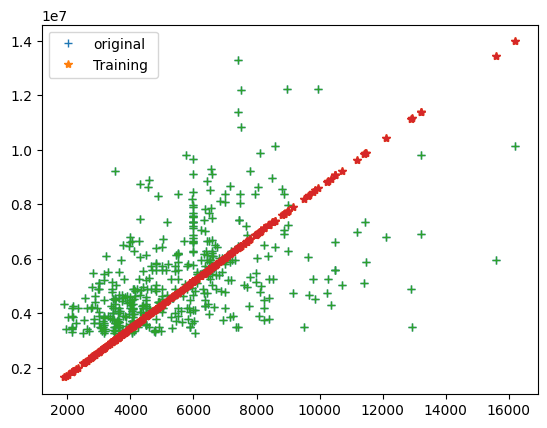

iteration =113,Loss = 1897429308430.656


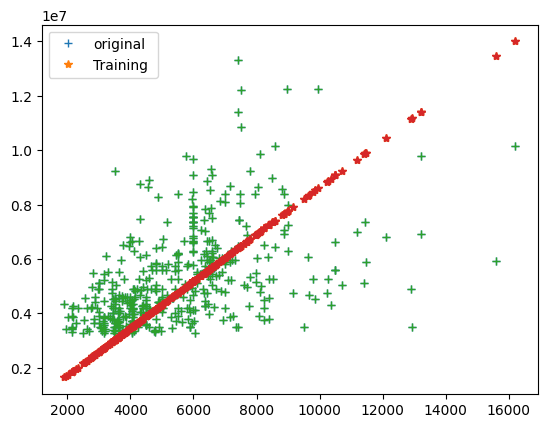

iteration =114,Loss = 1897109128817.1763


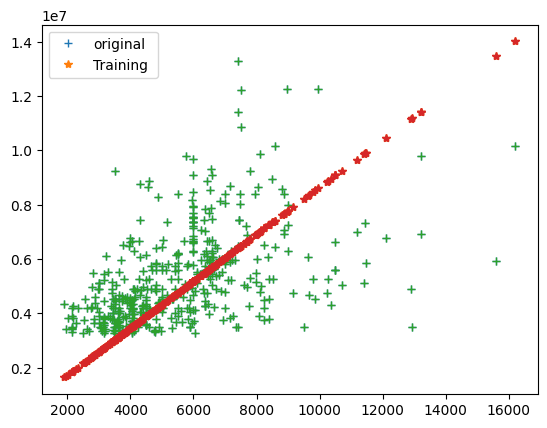

iteration =115,Loss = 1896810950656.8093


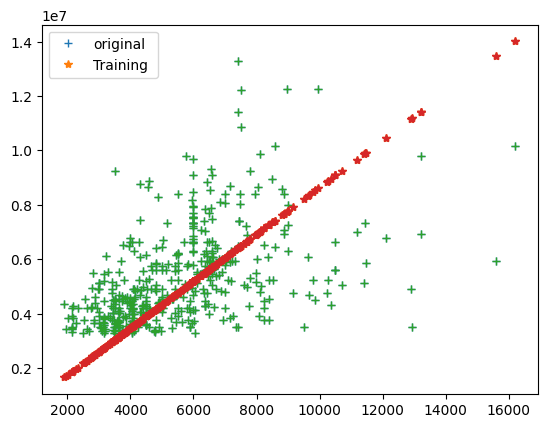

iteration =116,Loss = 1896533262097.3848


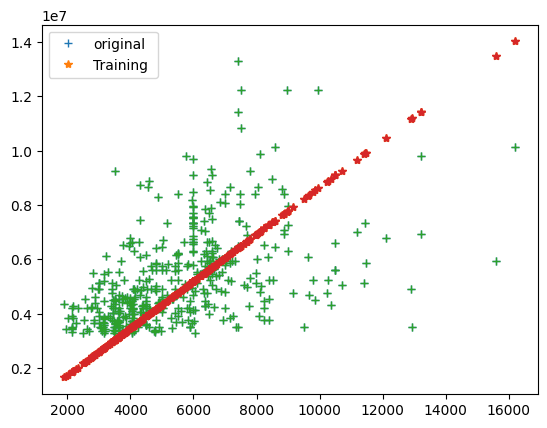

iteration =117,Loss = 1896274655175.1887


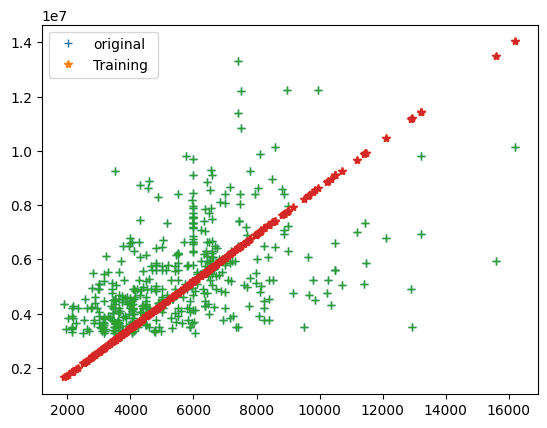

iteration =118,Loss = 1896033818676.1611


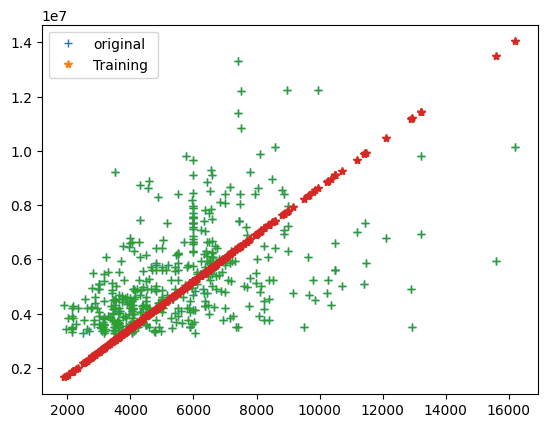

iteration =119,Loss = 1895809531487.6465


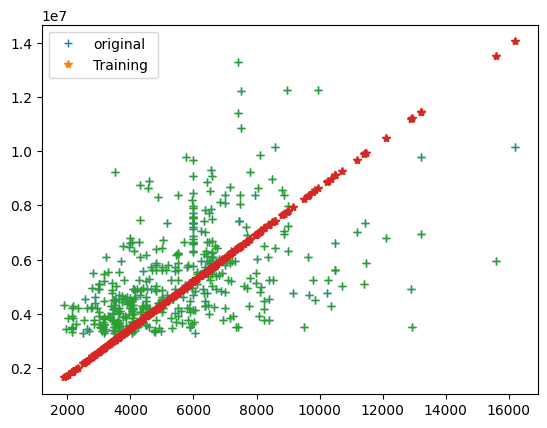

iteration =120,Loss = 1895600656406.9849


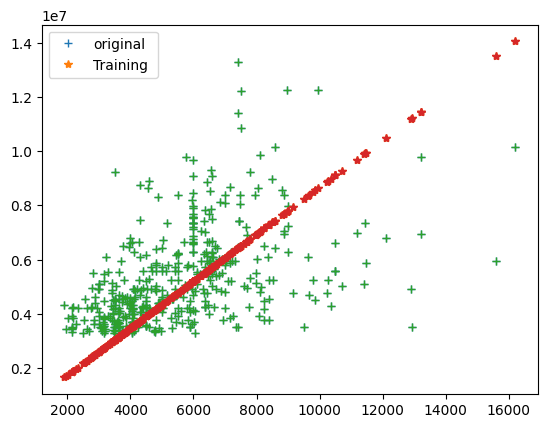

iteration =121,Loss = 1895406134375.5496


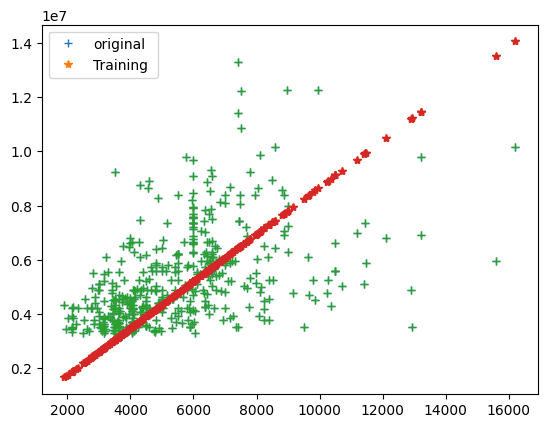

iteration =122,Loss = 1895224979109.0032


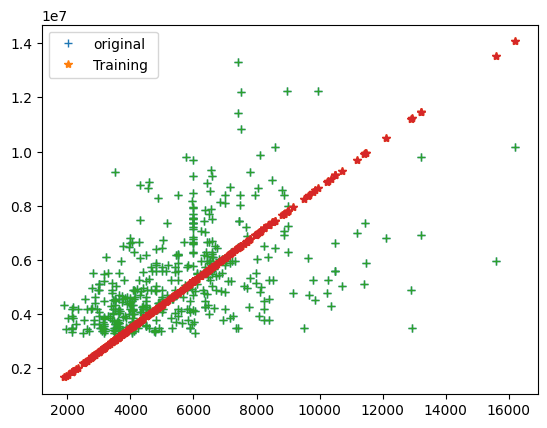

iteration =123,Loss = 1895056272096.5352


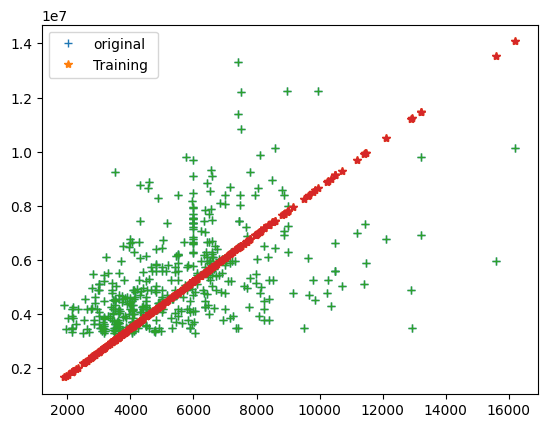

iteration =124,Loss = 1894899157943.7402


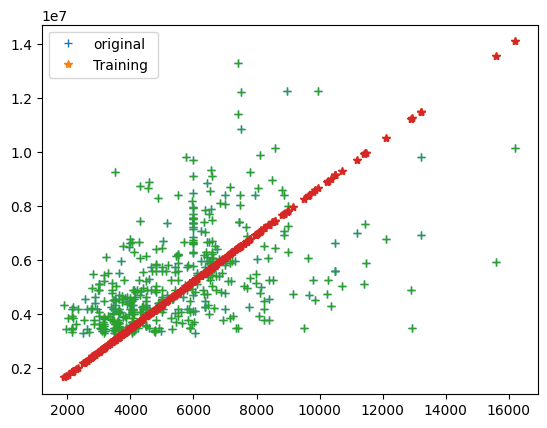

iteration =125,Loss = 1894752840035.5034


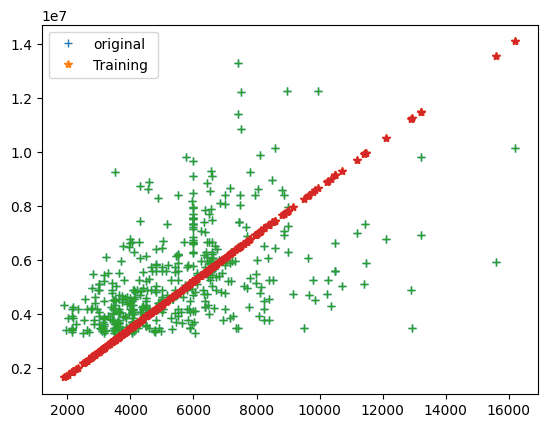

iteration =126,Loss = 1894616576496.929


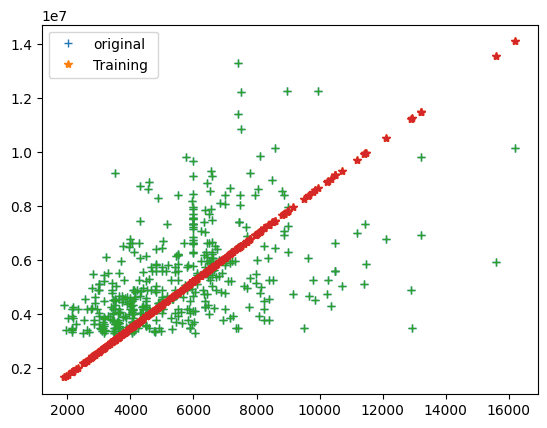

iteration =127,Loss = 1894489676431.8057


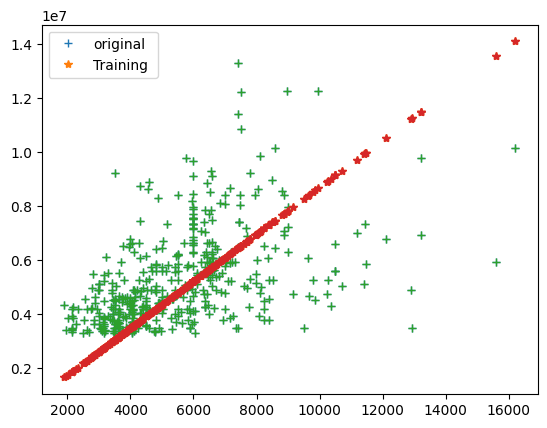

iteration =128,Loss = 1894371496419.5562


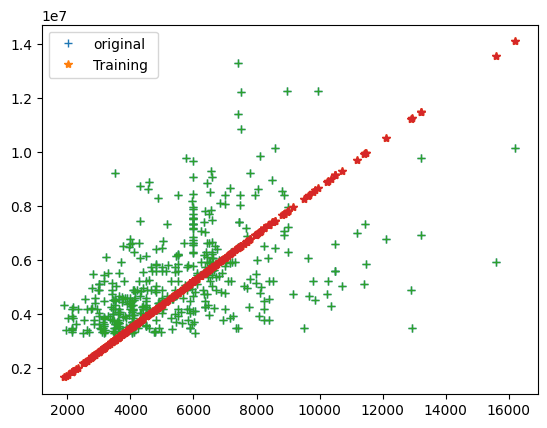

iteration =129,Loss = 1894261437252.901


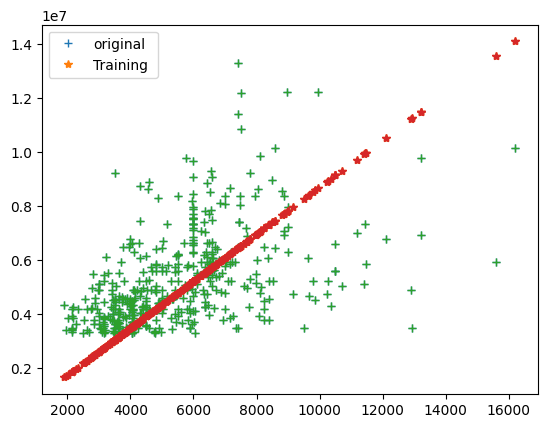

iteration =130,Loss = 1894158940899.6975


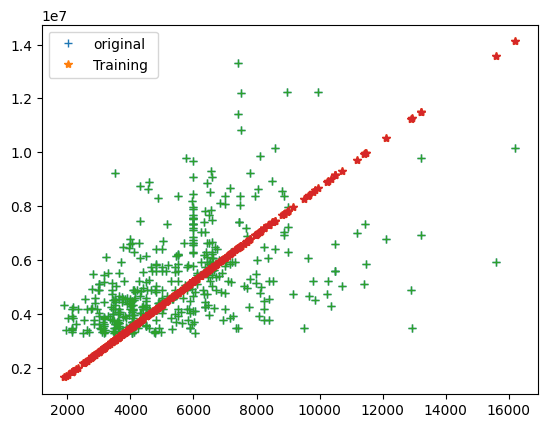

iteration =131,Loss = 1894063487673.5464


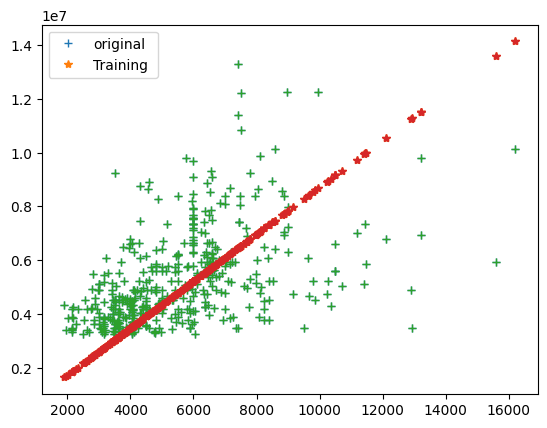

iteration =132,Loss = 1893974593598.828


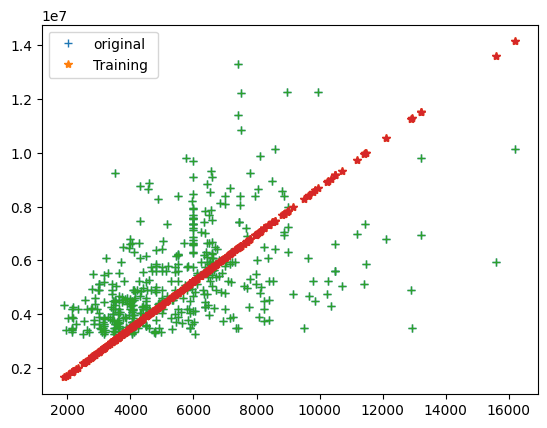

iteration =133,Loss = 1893891807956.7966


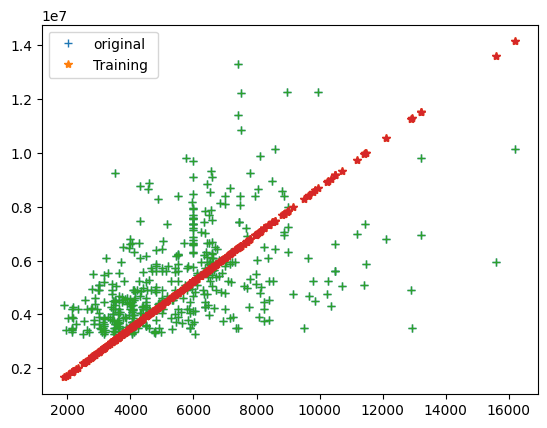

iteration =134,Loss = 1893814711000.3057


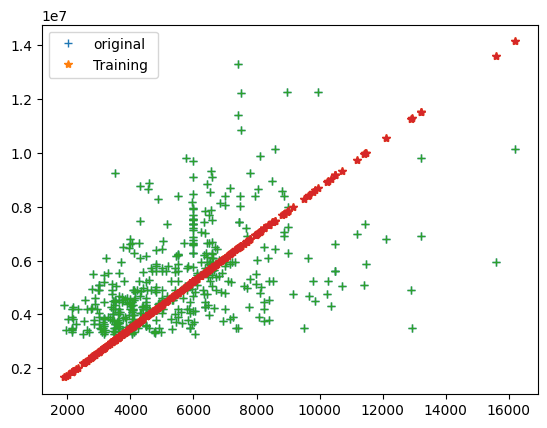

iteration =135,Loss = 1893742911825.555


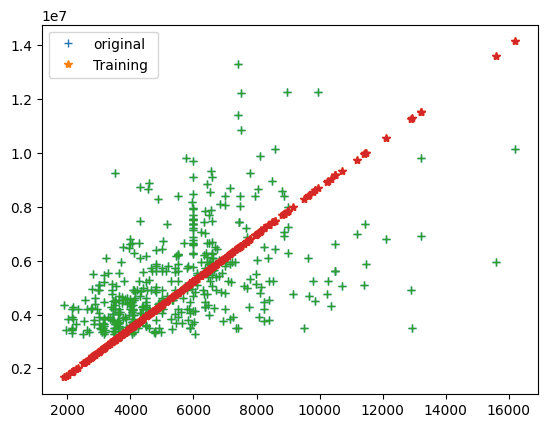

iteration =136,Loss = 1893676046390.0984


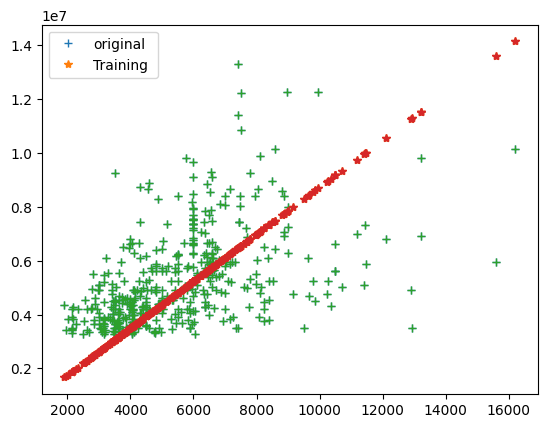

iteration =137,Loss = 1893613775667.0361


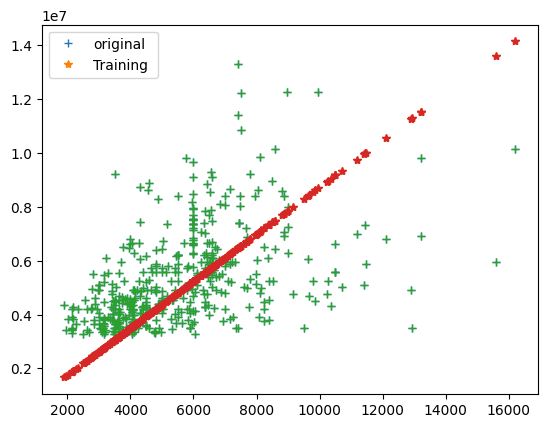

iteration =138,Loss = 1893555783926.0444


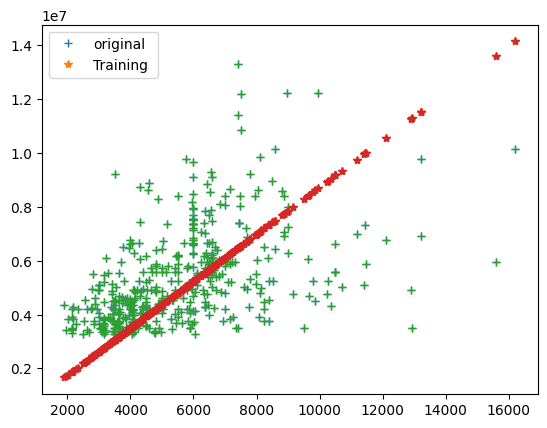

iteration =139,Loss = 1893501777132.5293


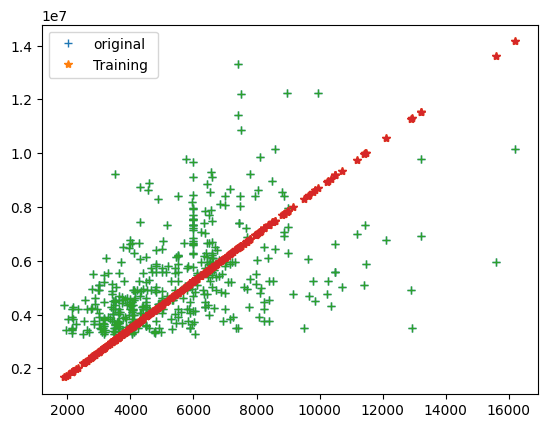

iteration =140,Loss = 1893451481456.7827


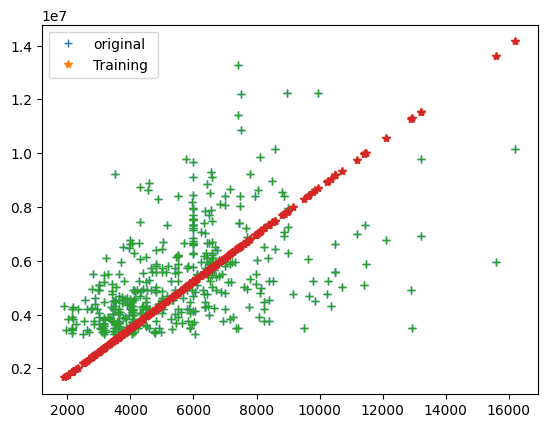

iteration =141,Loss = 1893404641885.582


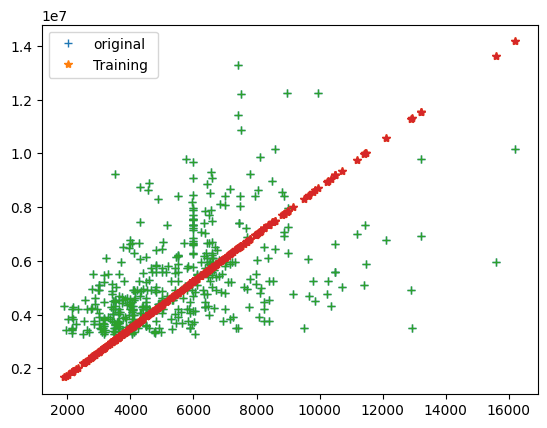

iteration =142,Loss = 1893361020929.197


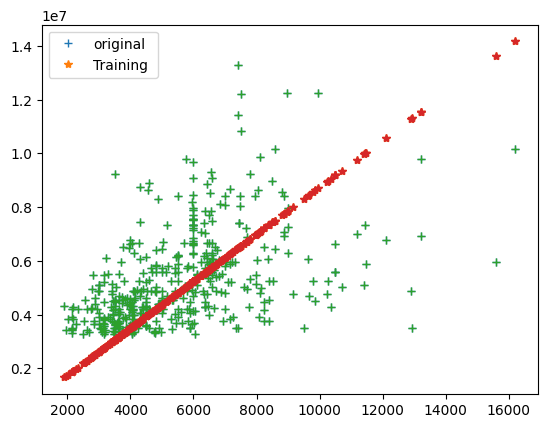

iteration =143,Loss = 1893320397417.246


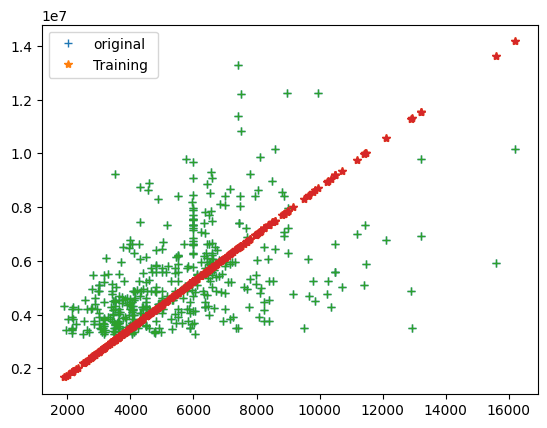

iteration =144,Loss = 1893282565377.2942


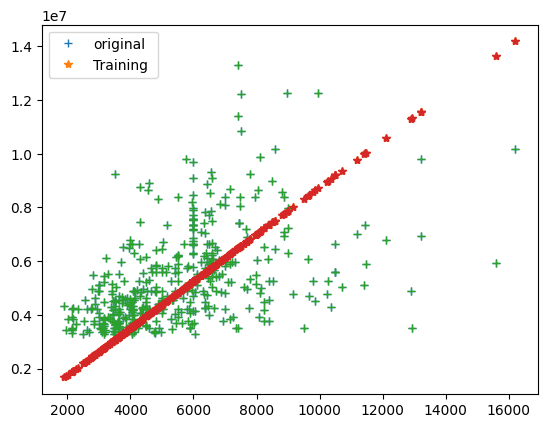

iteration =145,Loss = 1893247332990.511


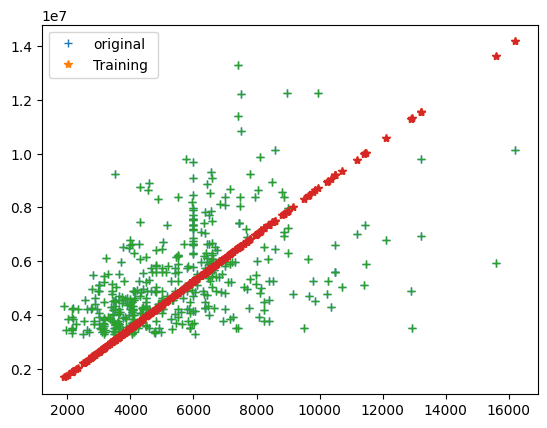

iteration =146,Loss = 1893214521619.0918


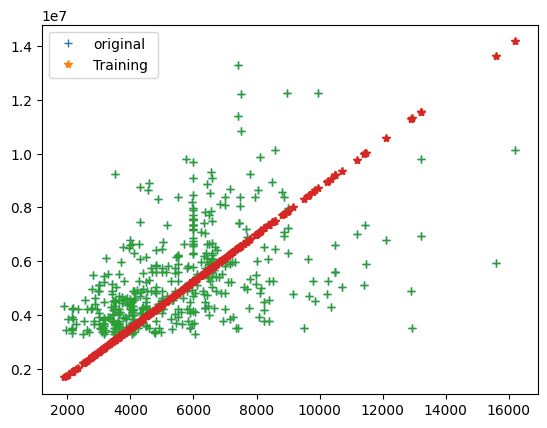

iteration =147,Loss = 1893183964900.5093


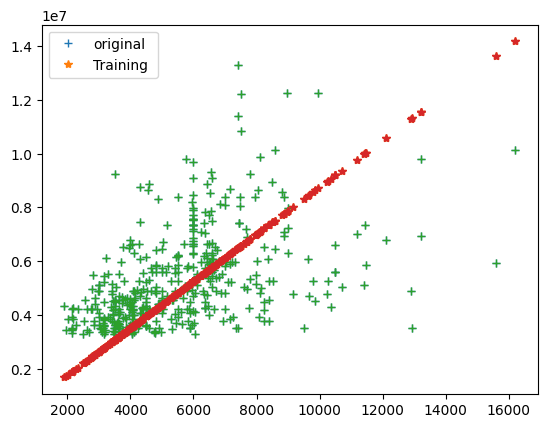

iteration =148,Loss = 1893155507904.0076


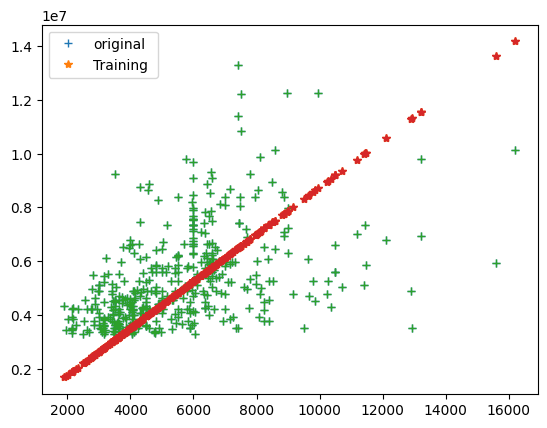

iteration =149,Loss = 1893129006345.0525


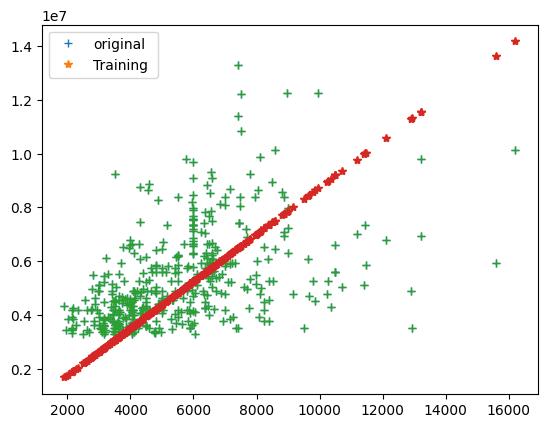

iteration =150,Loss = 1893104325853.7708


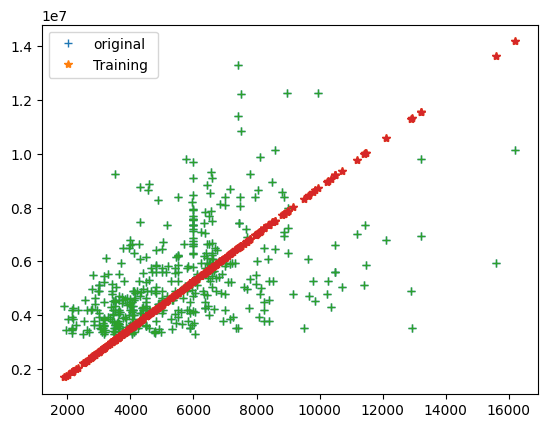

iteration =151,Loss = 1893081341293.6484


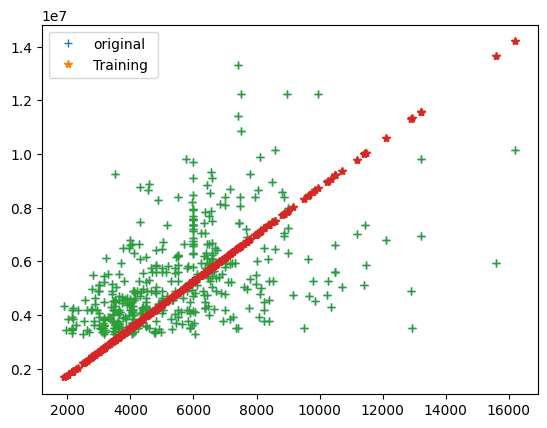

iteration =152,Loss = 1893059936127.0562


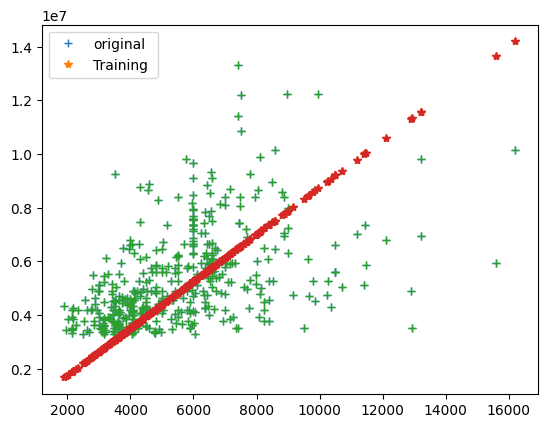

iteration =153,Loss = 1893040001824.3655


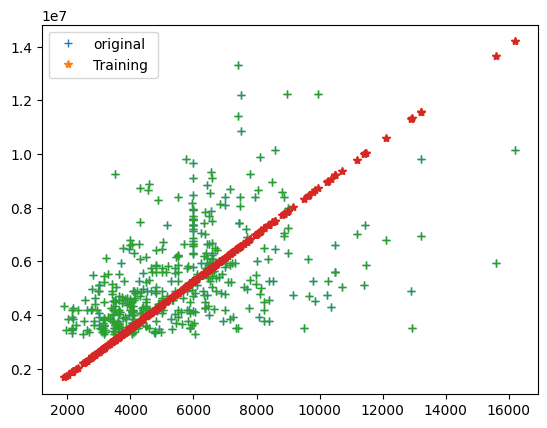

iteration =154,Loss = 1893021437313.6714


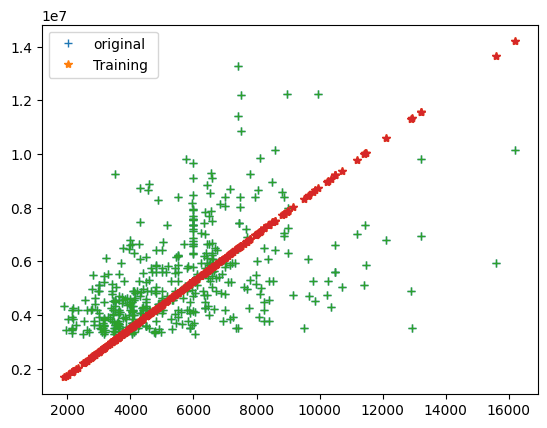

iteration =155,Loss = 1893004148468.3262


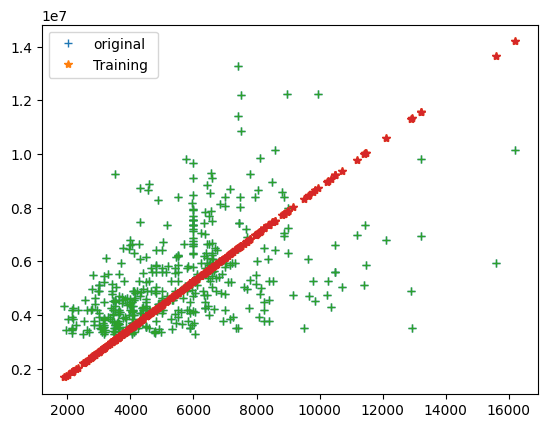

iteration =156,Loss = 1892988047629.6926


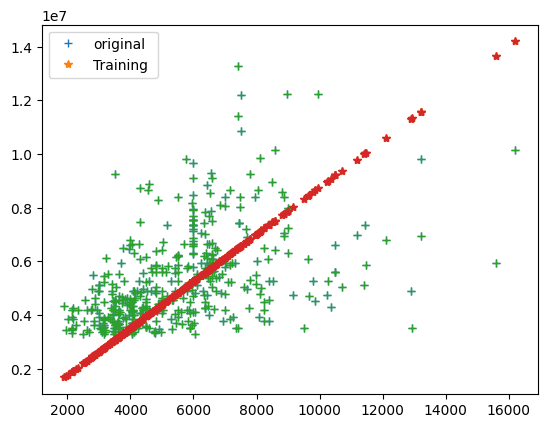

iteration =157,Loss = 1892973053162.6836


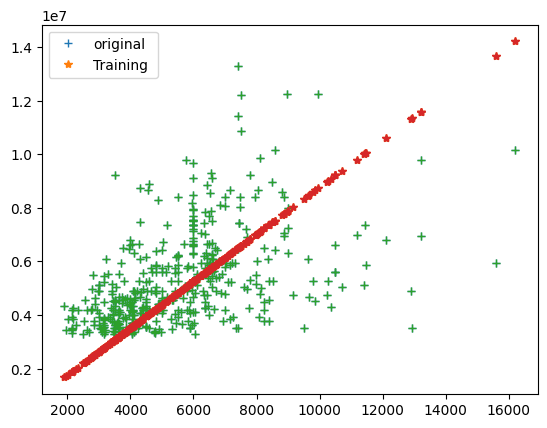

iteration =158,Loss = 1892959089041.8503


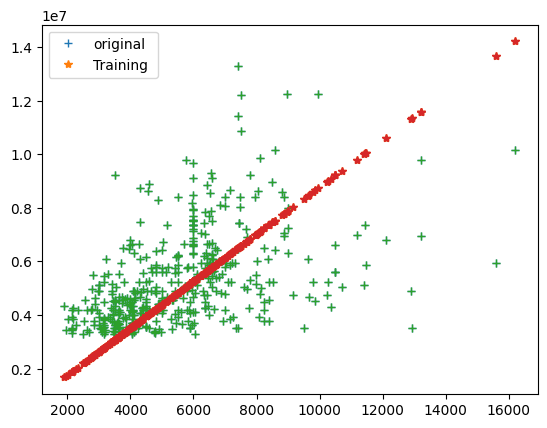

iteration =159,Loss = 1892946084465.911


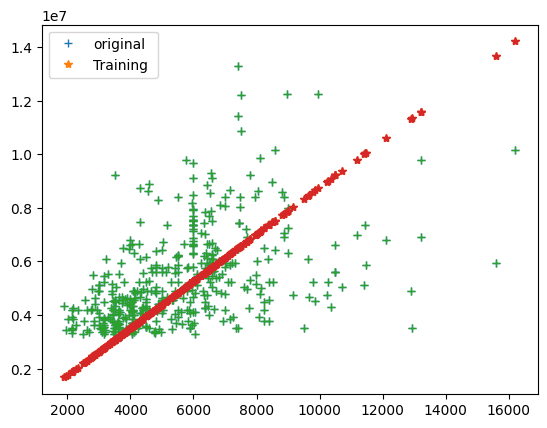

iteration =160,Loss = 1892933973498.7637


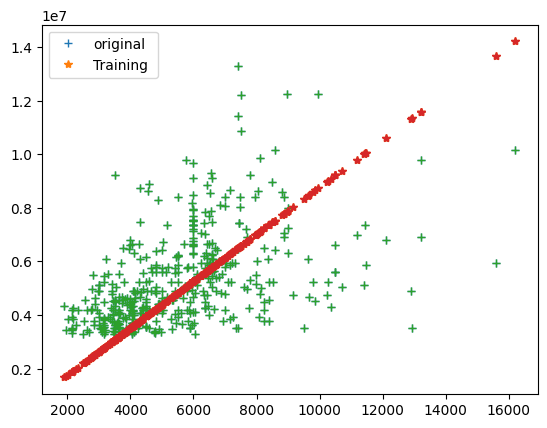

iteration =161,Loss = 1892922694735.1748


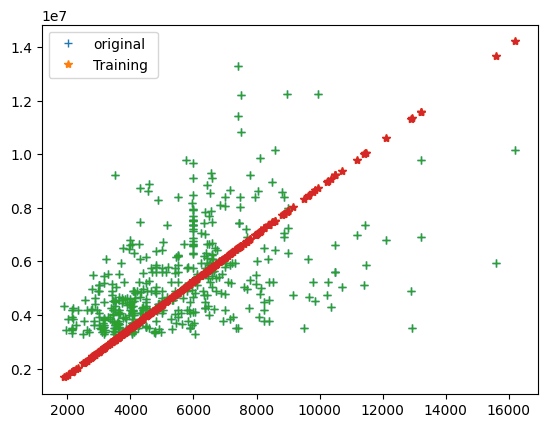

iteration =162,Loss = 1892912190989.4321


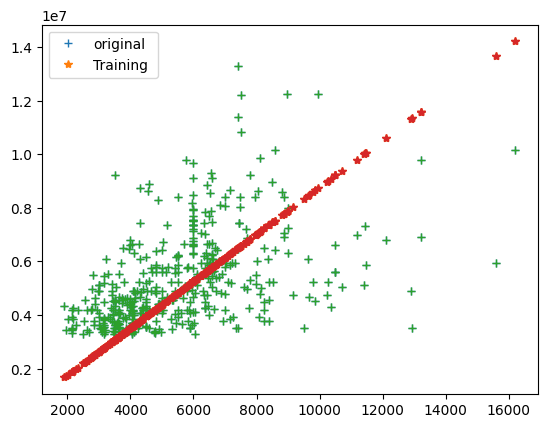

iteration =163,Loss = 1892902409005.3975


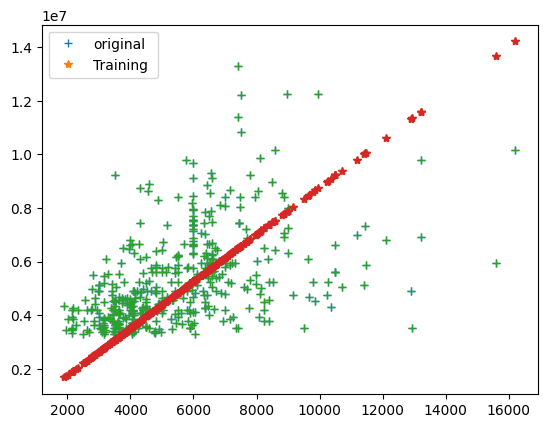

iteration =164,Loss = 1892893299186.4841


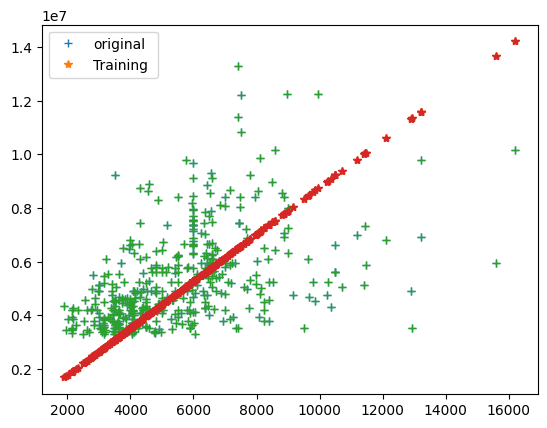

iteration =165,Loss = 1892884815344.1829


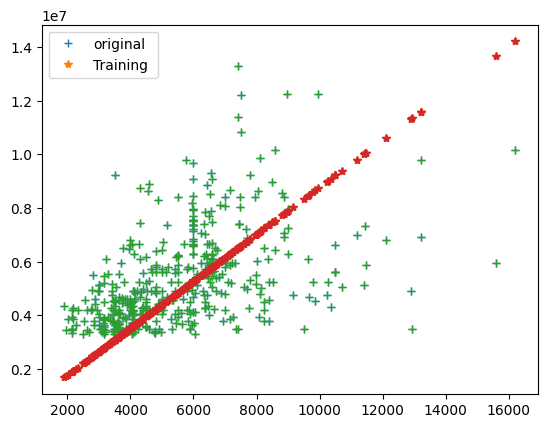

iteration =166,Loss = 1892876914463.8762


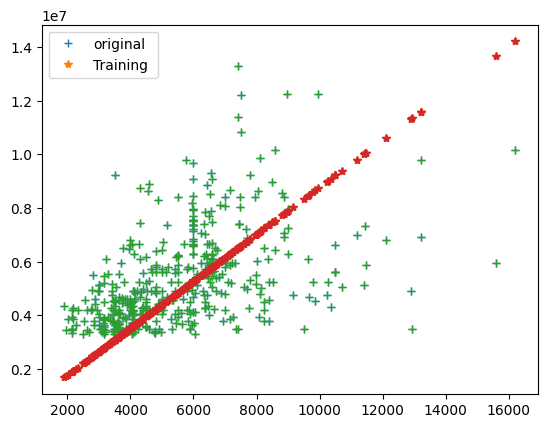

iteration =167,Loss = 1892869556486.7395


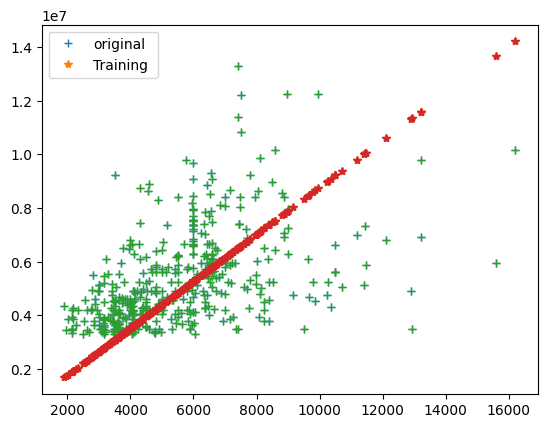

iteration =168,Loss = 1892862704106.6301


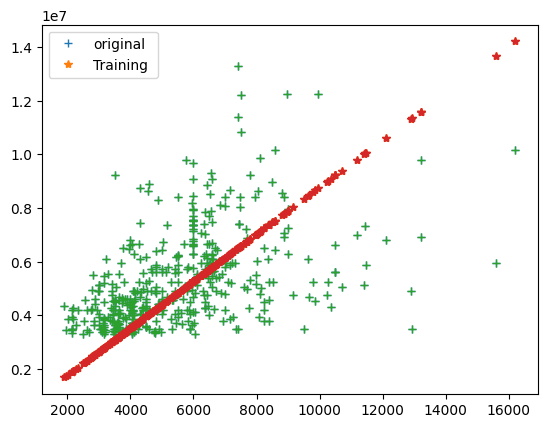

iteration =169,Loss = 1892856322580.9365


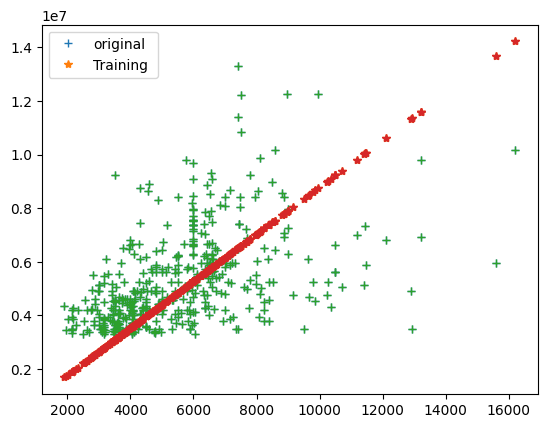

iteration =170,Loss = 1892850379554.4185


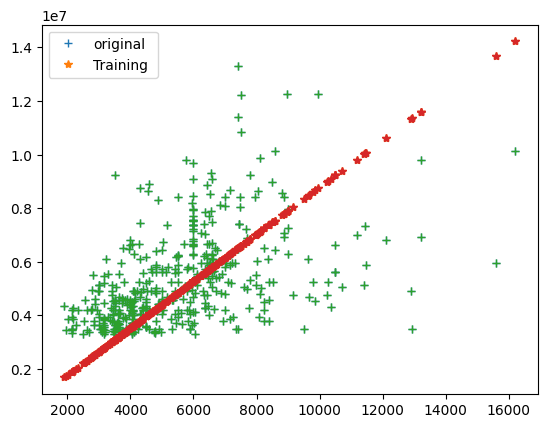

iteration =171,Loss = 1892844844895.1611


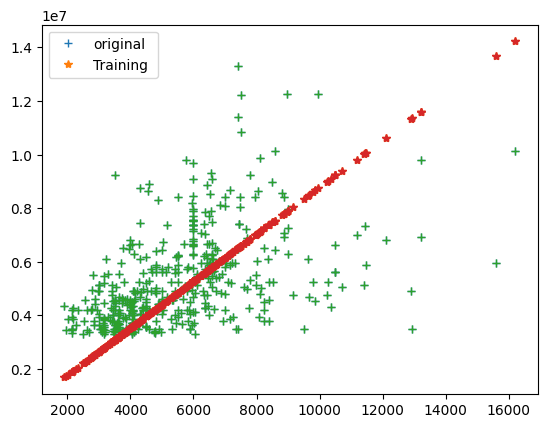

iteration =172,Loss = 1892839690541.7935


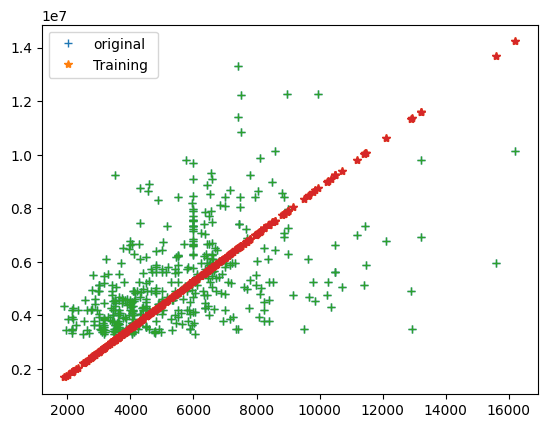

iteration =173,Loss = 1892834890361.211


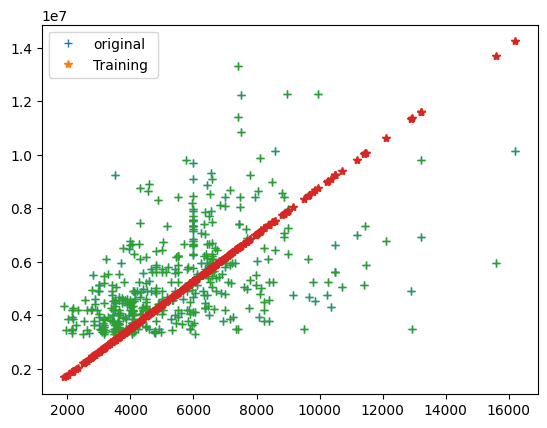

iteration =174,Loss = 1892830420016.071


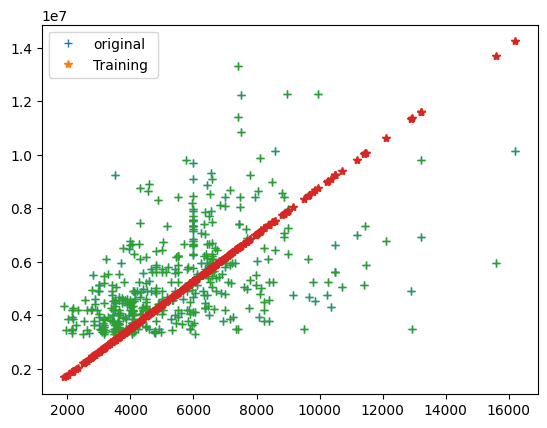

iteration =175,Loss = 1892826256841.3962


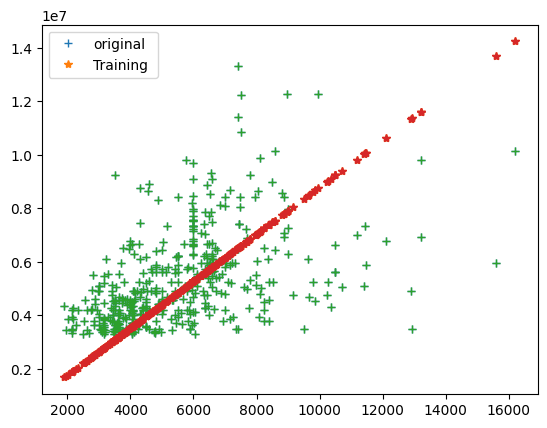

iteration =176,Loss = 1892822379729.6577


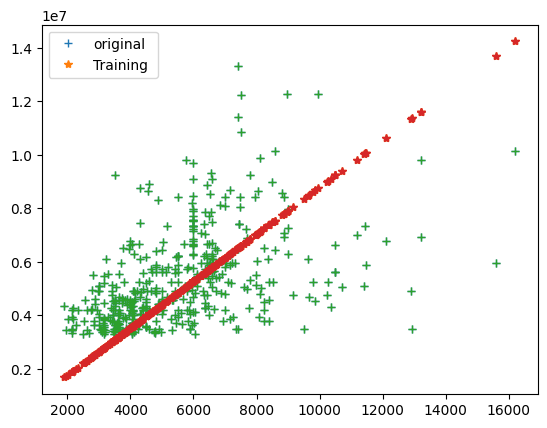

iteration =177,Loss = 1892818769023.7498


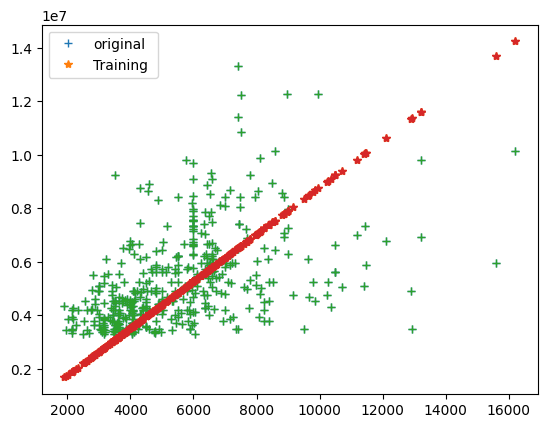

iteration =178,Loss = 1892815406417.3257


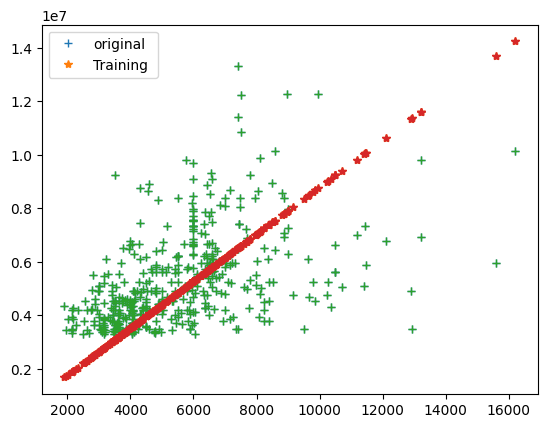

iteration =179,Loss = 1892812274861.9768


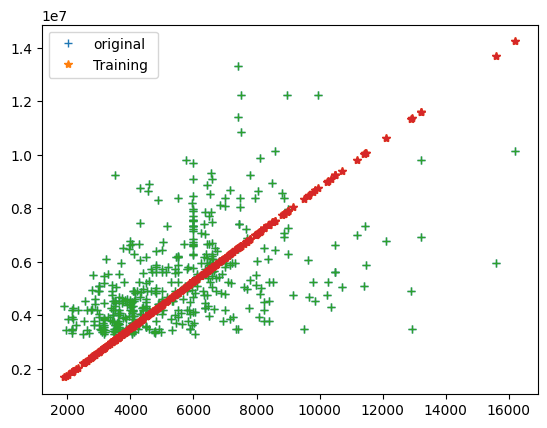

iteration =180,Loss = 1892809358480.7954


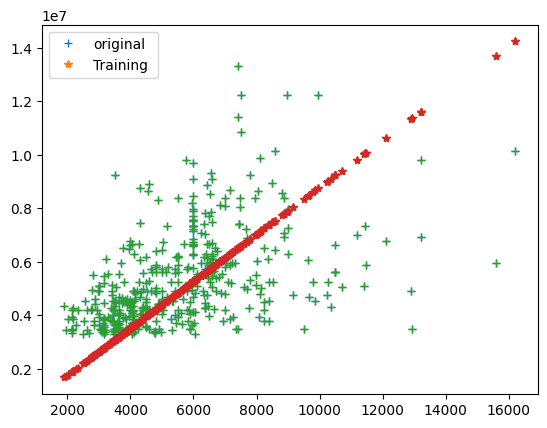

iteration =181,Loss = 1892806642487.8699


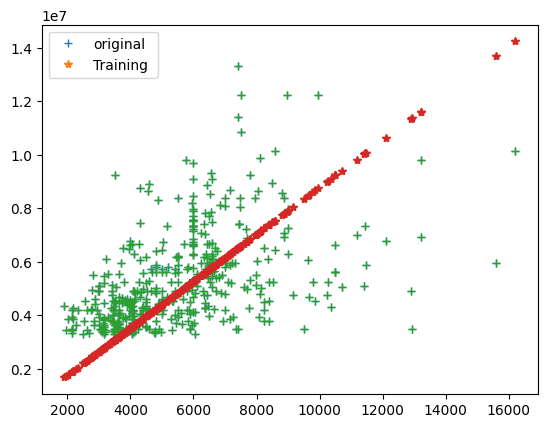

iteration =182,Loss = 1892804113113.3176


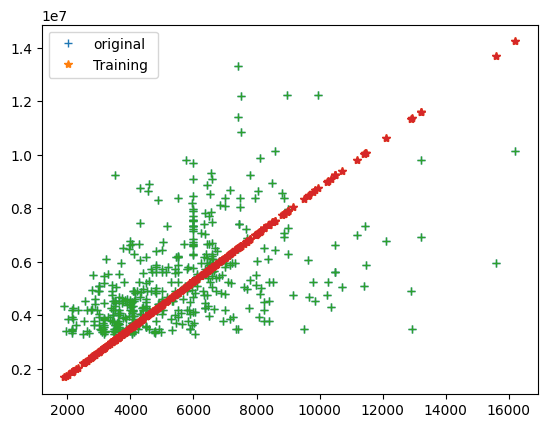

iteration =183,Loss = 1892801757533.4678


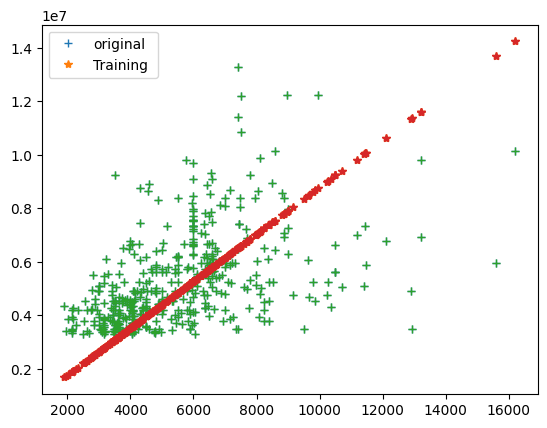

iteration =184,Loss = 1892799563805.8418


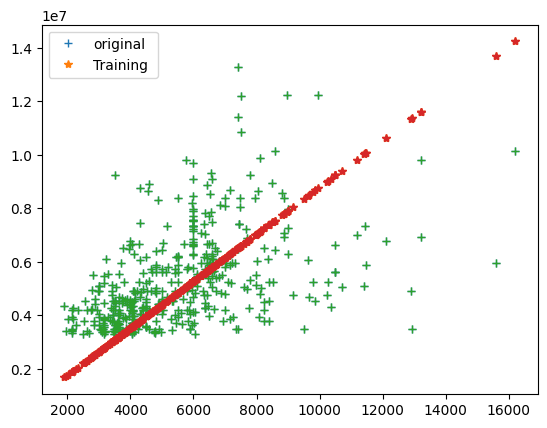

iteration =185,Loss = 1892797520808.599


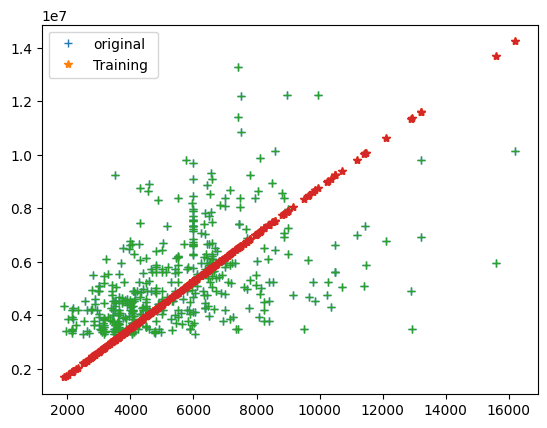

iteration =186,Loss = 1892795618184.1492


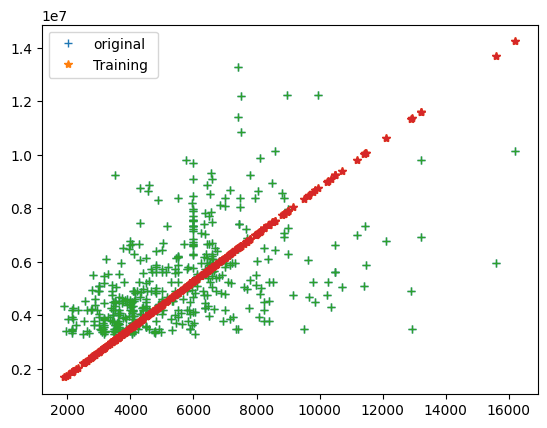

iteration =187,Loss = 1892793846286.632


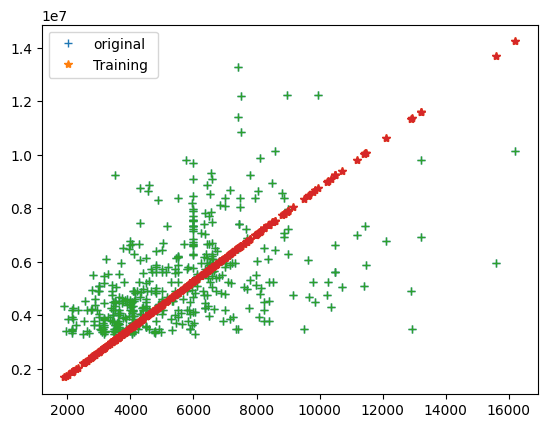

iteration =188,Loss = 1892792196133.0154


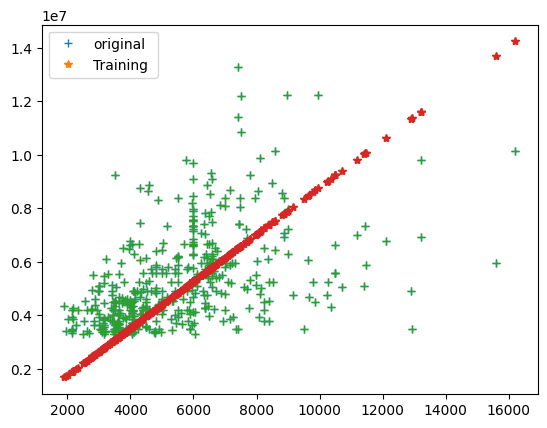

iteration =189,Loss = 1892790659357.5427


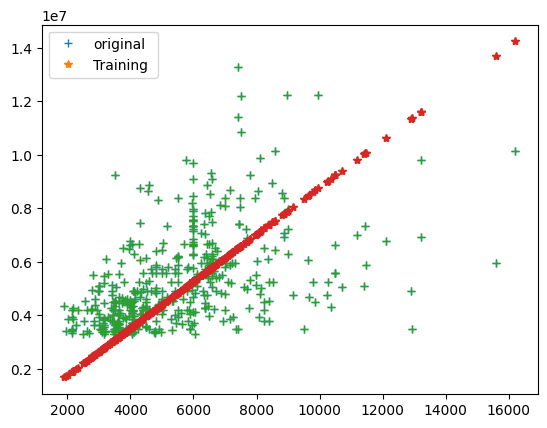

iteration =190,Loss = 1892789228169.32


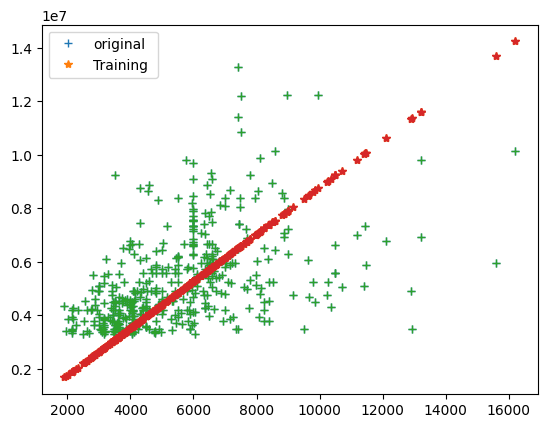

iteration =191,Loss = 1892787895312.8125


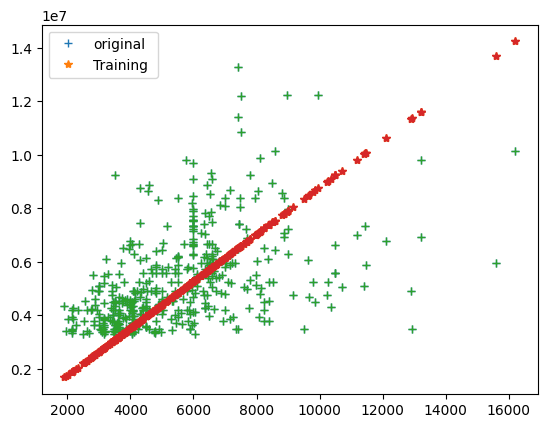

iteration =192,Loss = 1892786654031.0562


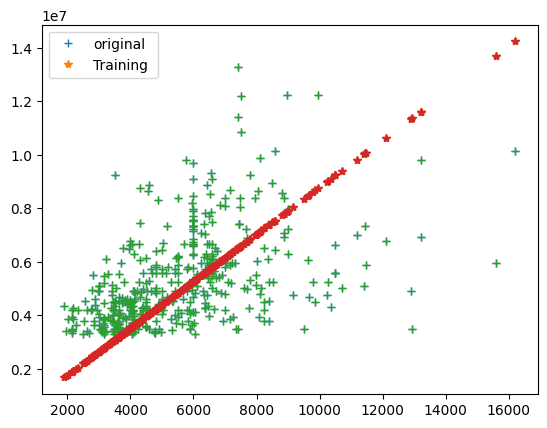

iteration =193,Loss = 1892785498031.3992


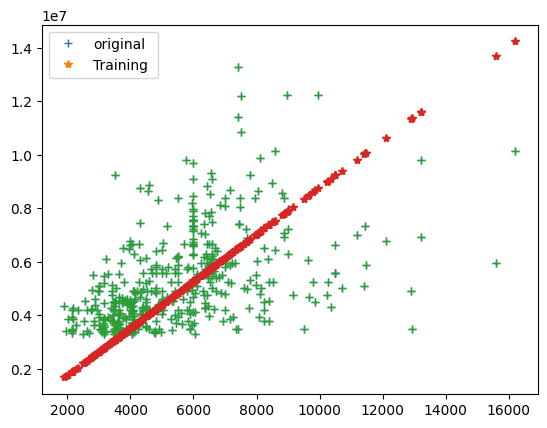

iteration =194,Loss = 1892784421453.5955


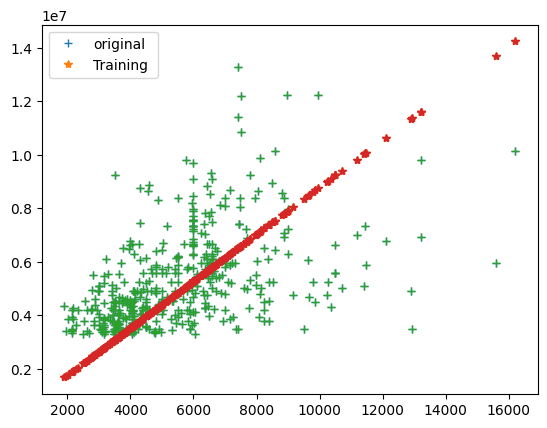

iteration =195,Loss = 1892783418840.0928


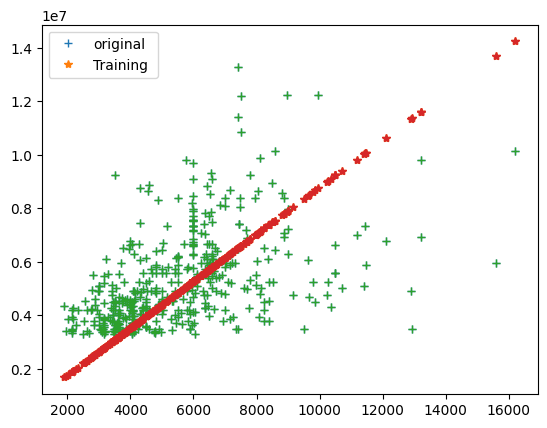

iteration =196,Loss = 1892782485108.358


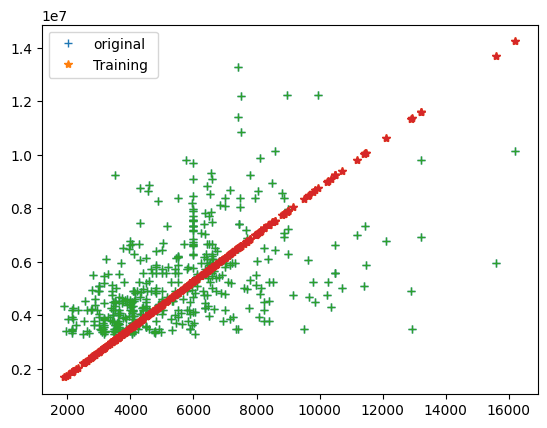

iteration =197,Loss = 1892781615525.1106


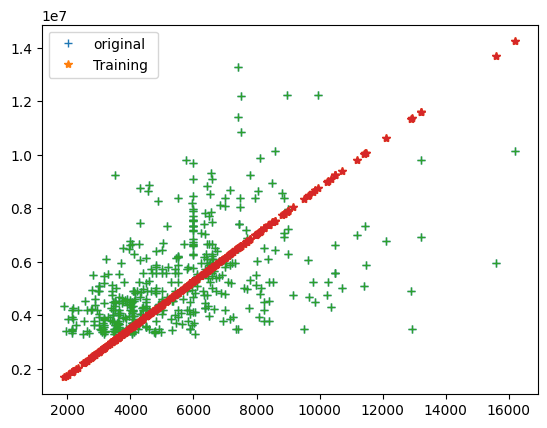

iteration =198,Loss = 1892780805682.3228


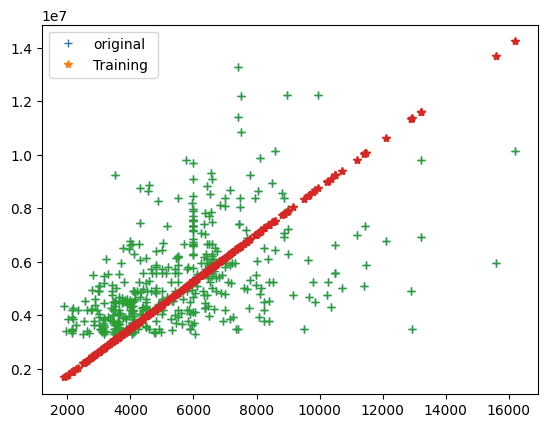

iteration =199,Loss = 1892780051474.8687


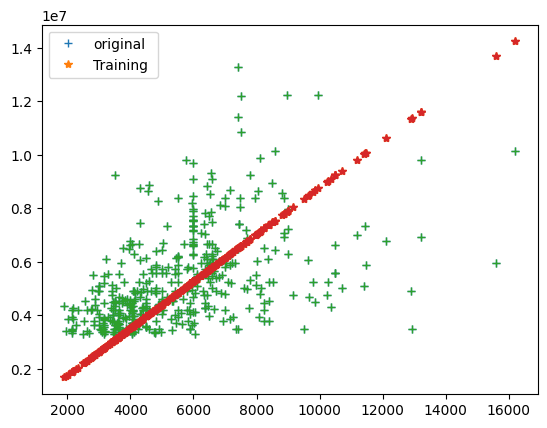

iteration =200,Loss = 1892779349079.7085


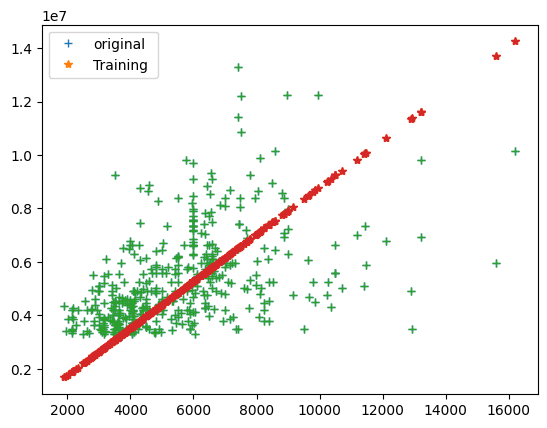

In [54]:
parameters,loss = train(train_input,train_output,1e-9,200)

In [52]:
print(parameters)

{'m': np.float64(879.9329360215895), 'c': np.float64(0.3433680880190631)}


In [55]:
loss

[np.float64(15417740722781.305),
 np.float64(14488358630115.074),
 np.float64(13622839970750.094),
 np.float64(12816796304080.408),
 np.float64(12066140745648.18),
 np.float64(11367067245407.055),
 np.float64(10716031289900.688),
 np.float64(10109731930510.637),
 np.float64(9545095046651.45),
 np.float64(9019257759052.264),
 np.float64(8529553914095.571),
 np.float64(8073500565614.402),
 np.float64(7648785385606.478),
 np.float64(7253254940033.954),
 np.float64(6884903770263.47),
 np.float64(6541864224786.099),
 np.float64(6222396989661.0),
 np.float64(5924882269669.239),
 np.float64(5647811575463.562),
 np.float64(5389780075072.506),
 np.float64(5149479470978.672),
 np.float64(4925691366655.772),
 np.float64(4717281088930.84),
 np.float64(4523191934849.064),
 np.float64(4342439813871.147),
 np.float64(4174108258237.522),
 np.float64(4017343776200.4346),
 np.float64(3871351524563.409),
 np.float64(3735391278586.5483),
 np.float64(3608773678823.8794),
 np.float64(3490856735863.09),
 np.

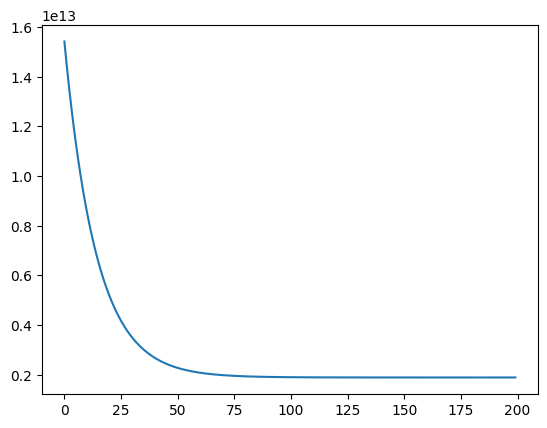

In [56]:
plt.plot(loss)

In [57]:
from IPython.display import Markdown,display
display(Markdown("## let's predict"))


## let's predict

In [58]:
test_predictions = test_input * parameters["m"] + parameters["c"]


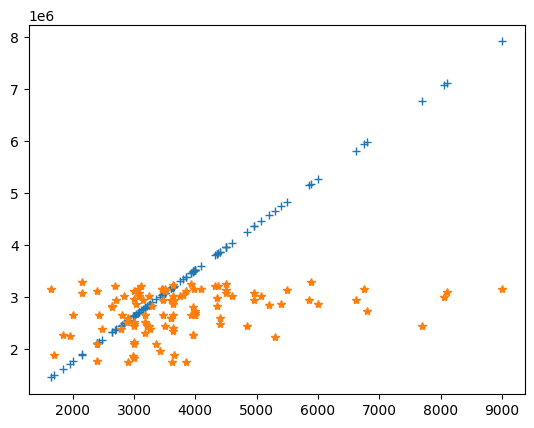

In [59]:
plt.plot(test_input,test_predictions,"+")
plt.plot(test_input,test_output,"*")